#Extração de Conhecimento de Dados Biológicos

## Trabalho prático 2 - Analise de conjuntos de dados de atividades de compostos químicos sobre a enzima cyp2c19

#### Grupo 6 - Pedro Perreira PG55703 , Alexandre Ferreira PG55691, Sami Kawashita PG55704


# Introdução

O citocromo P450 2C19 (CYP2C19) é uma enzima pertencente à subfamília CYP2C do citocromo P450, desempenhando um papel essencial no metabolismo de xenobióticos. Essa enzima está presente principalmente no fígado e no intestino, onde catalisa reações oxidativas que influenciam a biotransformação de diversos fármacos.
Entre os compostos metabolizados pelo CYP2C19 estão inibidores de bomba de prótons, drogas antiepilépticas e antimaláricos, além de outros medicamentos essenciais para a prática clínica. No entanto, o CYP2C19 não atua isoladamente—ele faz parte de um grupo maior de enzimas CYP, responsáveis pelo metabolismo de aproximadamente dois terços dos fármacos disponíveis no mercado.
Dentre as diversas isoformas do citocromo P450, cinco enzimas (CYP1A2, CYP2C9, CYP2C19, CYP2D6 e CYP3A4) são responsáveis por cerca de 80% do metabolismo de fármacos. Devido à sua relevância, é fundamental realizar estudos em larga escala para identificar quais compostos são metabolizados por essas enzimas. Esse conhecimento permite um desenvolvimento mais eficiente de novos fármacos, otimizando sua absorção, distribuição e eliminação no organismo.

# Análise do conjunto de dados e sua breve descrição

Este notebook corresponde ao Trabalho Prático 2 da unidade curricular Extração de Conhecimento de Dados Biológicos, desenvolvido pelo Grupo 6.

O objetivo deste trabalho é analisar um conjunto de dados biológicos utilizando Python e bibliotecas estudadas ao longo do semestre. O dataset atribuído ao nosso grupo é o cyp2c19, que inclui descritores químicos (variáveis numéricas) e respetivas classificações de atividade para diferentes compostos.

Neste notebook, serão realizadas as seguintes etapas:

Carregamento e pré-processamento dos dados;
Análise exploratória com estatísticas e visualizações;
Métodos de análise multivariada (como redução de dimensionalidade e clustering);
Modelos de machine learning para prever a atividade dos compostos;
Avaliação dos modelos e análise da importância das variáveis.





In [ ]:
# =========================
# 1. Importação de Pacotes
# =========================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact, mannwhitneyu, pointbiserialr

# Configurações de estilo
sns.set(style="whitegrid")
%matplotlib inline

# =========================
# 2. Leitura dos Dados
# =========================
# Carrega os dados de atributos e saídas
feat = pd.read_csv("/content/cyp2c19_features.csv")
out = pd.read_csv("/content/cyp2c19_outputs.csv")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Visualização das dimensões
print("Dimensões do dataset de features:", feat.shape)
print("Dimensões do dataset de outputs:", out.shape)

# Visualização inicial
display(feat.head())
display(out.head())

Dimensões do dataset de features: (12513, 208)
Dimensões do dataset de outputs: (12513, 3)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.609395,0.000000,11.609395,0.000000,0.884168,346.302,321.102,345.13748,124.0,0.0,0.223859,-0.367762,0.367762,0.223859,1.227273,1.909091,2.454546,35.495716,10.186498,2.176042,-2.355559,2.292867,-2.458013,6.332095,-0.115749,0.000002,488.27930,15.242276,13.270686,14.843112,10.134561,7.703653,8.081617,5.385677,5.792877,3.868692,4.171425,2.596662,2.896728,-0.97,5.654502e+04,19.077550,9.232351,5.041386,143.76240,15.116608,0.000000,0.000000,5.907180,0.000000,0.000000,4.794537,0.000000,0.000000,12.407033,25.448414,31.164679,38.287235,10.710019,4.794537,41.289925,0.0,4.899909,0.0,26.689117,42.940480,23.221735,0.0,0.000000,10.216699,11.374773,0.000000,24.007973,43.530872,4.794537,0.0,26.689117,18.199100,5.022633,0.000000,0.0,35.58,0.000000,4.794537,0.0,18.314213,11.443455,50.519375,0.000000,0.000000,25.122839,22.040346,11.600940,0.000000,6.386941,16.355310,3.582878,1.828986,0.039701,5.780863,1.386610,9.416489,0.000000,0.562500,22.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,6.0,5.0,0.0,1.0,1.0,2.0,3.6423,96.5647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.610409,-3.973681,12.610409,0.072387,0.720978,355.418,346.346,354.96430,114.0,0.0,0.395588,-0.413988,0.413988,0.395588,1.272727,2.045454,2.681818,32.248260,10.282243,2

,ids,smiles,Y
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0
1,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1
2,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
3,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
4,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1


In [ ]:
# =========================
# 3. Análise Exploratória Inicial
# =========================

# Verifica valores nulos
print("Valores nulos nas features:\n", feat.isnull().sum().sum())
print("Valores nulos nos outputs:\n", out.isnull().sum().sum())

# Tipo das variáveis
print("\nTipos de dados nas features:")
print(feat.dtypes.value_counts())

# Estatísticas descritivas básicas
display(feat.describe())

Valores nulos nas features:
 0
Valores nulos nos outputs:
 0

Tipos de dados nas features:
float64    208
Name: count, dtype: int64


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.0,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.00000,1.251300e+04,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.0,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.0,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.

In [ ]:
colunas=[]
for col in feat.columns:
  colunas.append(col)

colunas

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

De modo a facilitar interpretação futuras juntamos as variáveis de ambos os datasets

In [ ]:
df = pd.concat([feat, out["Y"]], axis=1)
print("Dataset combinado:", df.shape)

Dataset combinado: (12513, 209)


In [ ]:
# 1.1) Tipos de dados
print("\nTipos de variáveis:\n", df.dtypes.value_counts())


Tipos de variáveis:
 float64    208
int64        1
Name: count, dtype: int64



Distribuição de Y:
 Y
0    0.536162
1    0.463838
Name: proportion, dtype: float64


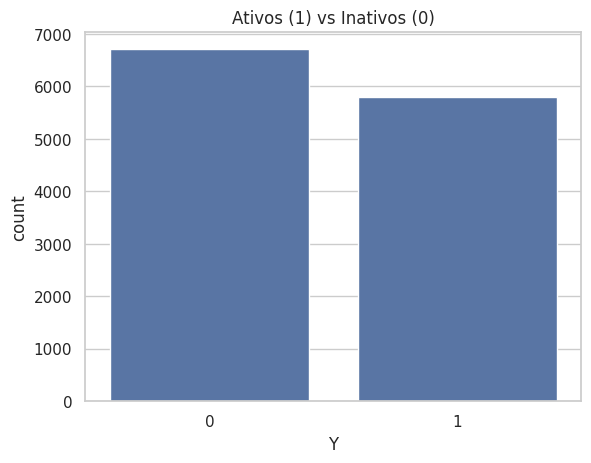

In [ ]:
print("\nDistribuição de Y:\n", df["Y"].value_counts(normalize=True))
sns.countplot(x="Y", data=df)
plt.title("Ativos (1) vs Inativos (0)")
plt.show()

Y=1 = compostos que interagiram (ativaram/inibiram/metabolizados) o CYP2C19,

Y=0 = compostos que não interagiram de forma relevante com a isoforma.

**MolWt (Molecular Weight)**

O que é: massa total da molécula, em Dalton (g/mol), obtida pela soma das massas atômicas de todos os átomos presentes.

Por que importa: compostos com peso molecular elevado (geralmente > 500 Da) tendem a apresentar menor penetração celular e pior biodisponibilidade. A “Regra dos 5” de Lipinski recomenda MolWt < 500 Da para favorecer boa absorção oral.

**MolLogP (CLogP ou LogP)**

O que é: coeficiente de partição octanol/água em escala logarítmica, que indica a lipofilicidade da molécula.

Por que importa: moléculas muito polares (logP < 0) podem ter dificuldade em atravessar membranas lipídicas, enquanto moléculas muito lipofílicas (logP > 5) podem se acumular em tecidos adiposos e apresentar baixa solubilidade em meio aquoso. Valores ideais geralmente ficam entre 1 e 3 para muitos fármacos.

**TPSA (Topological Polar Surface Area)**

O que é: soma das áreas de superfície polar dos átomos de nitrogênio e oxigênio (e hidrogênios ligados a eles) na molécula, calculada a partir da topologia molecular (estrutura 2D).

Por que importa: TPSA correlaciona-se fortemente com a capacidade de permeação celular e previsão de absorção intestinal, passagem pela barreira hematoencefálica (BHE) e outras barreiras biológicas. Moléculas com TPSA < 140 Å² tendem a ter boa permeabilidade intestinal; TPSA < 90 Å² favorece a passagem pela BHE. Valores muito altos podem prejudicar a absorção oral e a distribuição no sistema nervoso central.

**QED (Quantitative Estimate of Drug-Likeness)**

O que é: score agregado de 0 a 1 que combina múltiplas propriedades (MolWt, logP, TPSA, número de doadores/aceitadores de H, etc.) para estimar o quão “parecido com fármaco” um composto é.

Por que importa: valores altos (próximos de 1) indicam moléculas que atendem melhor aos critérios clássicos de “drug-likeness”, facilitando o desenvolvimento (absorção, segurança, síntese).

**FractionCSP3**

O que é: fração de carbonos sp³ (tetraédricos, saturados) em relação ao total de carbonos da molécula.

Por que importa: maior fração sp³ está associada a moléculas mais tridimensionais, menos planas, geralmente com maior solubilidade, menor toxicidade e melhor perfil farmacocinético. Valores acima de 0,4 são frequentemente desejáveis em candidatos a fármacos.

Essas descrições estão alinhadas com o uso desses parâmetros em química medicinal e desenvolvimento de fármacos, especialmente TPSA, que é amplamente reconhecido como preditor de permeabilidade e absorção

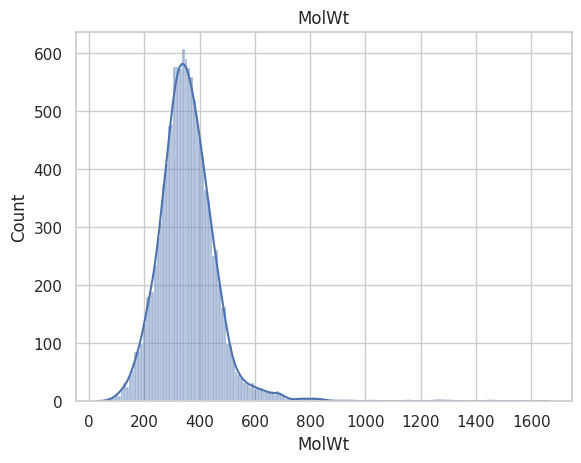

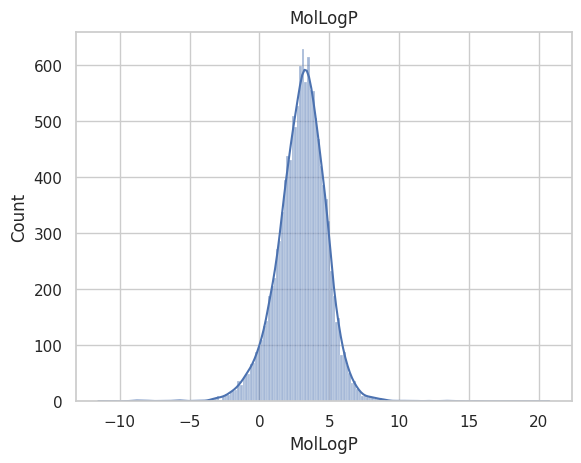

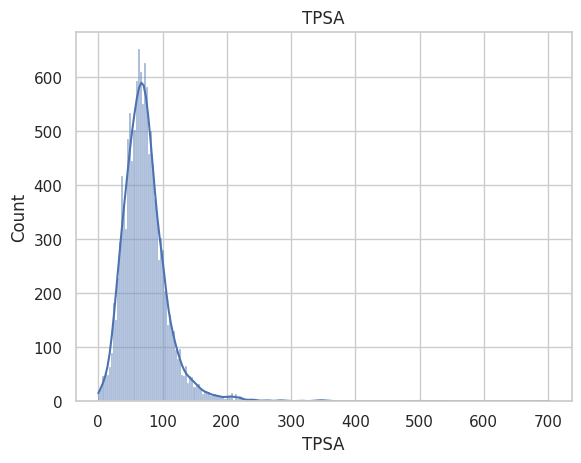

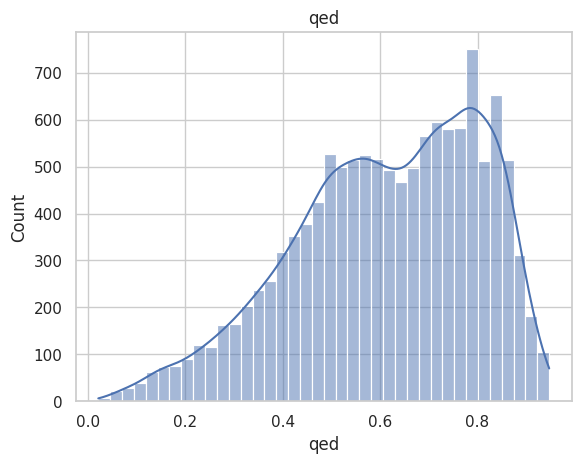

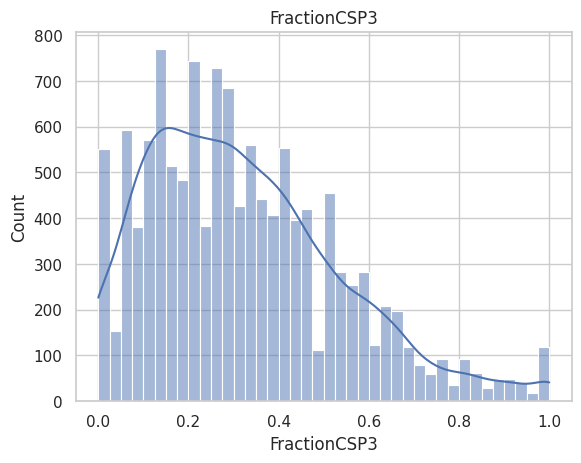

In [ ]:
for feat in ["MolWt","MolLogP","TPSA","qed","FractionCSP3"]:
    plt.figure()
    sns.histplot(df[feat], kde=True)
    plt.title(feat)
    plt.show()


Os gráficos acima apresentam a distribuição de diversas propriedades moleculares. O eixo X representa a propriedade analisada, enquanto o eixo Y indica a frequência das moléculas no conjunto de dados.

A análise do peso molecular (MolWt) mostra que a maioria das moléculas tem um peso moderado, concentrado em torno de 350 Da, com uma distribuição normal entre 200 e 400 Da. Há uma cauda estendida para moléculas maiores (>600 Da), mas poucas ultrapassam 1000 Da. Moléculas menores tendem a ter melhor absorção e permeabilidade, enquanto moléculas moderadas (200-500 Da) equilibram bioatividade e eficácia. Já moléculas acima de 600 Da podem ter desafios de permeabilidade, mas ainda podem ser úteis biologicamente.

A distribuição de MolLogP, que mede a lipofilicidade, mostra um pico em torno de 2.5, indicando que a maioria das moléculas tem uma lipofilicidade moderada. A maioria dos valores está entre 0 e 5, sugerindo um equilíbrio entre compostos hidrofílicos e lipofílicos. Poucas moléculas apresentam valores extremos (<-5 ou >10), o que reforça que a maioria dos compostos está dentro da faixa ideal para absorção de fármacos (entre 1 e 3). Moléculas muito polares podem ter dificuldade em atravessar membranas, enquanto moléculas excessivamente lipofílicas podem se acumular em tecidos adiposos e ter baixa solubilidade.

O TPSA (Topological Polar Surface Area), que reflete a área polar da molécula, apresenta uma distribuição desviada para a direita, com um pico entre 50 e 100 Å², indicando polaridade moderada. Poucas moléculas têm TPSA acima de 300 Å², o que sugere que moléculas altamente polares são raras no conjunto de dados. Valores abaixo de 140 Å² favorecem a permeabilidade intestinal, enquanto valores abaixo de 90 Å² facilitam a passagem pela barreira hematoencefálica. Por outro lado, TPSA acima de 200 Å² pode indicar boa solubilidade, mas menor permeabilidade, e valores extremos (>500 Å²) podem dificultar a penetração em membranas lipídicas.

A análise do QED (Quantitative Estimate of Drug-Likeness) revela que a maioria das moléculas tem alta drug-likeness, com um pico em torno de 0.8. A distribuição favorece valores elevados, indicando que muitas moléculas são bem adaptadas para o desenvolvimento de fármacos. Poucas moléculas apresentam QED abaixo de 0.4, o que sugere que há poucos compostos não drug-like no conjunto de dados. Quanto mais próximo de 1, maior a probabilidade de a molécula ter propriedades favoráveis, enquanto valores baixos podem indicar baixa solubilidade, permeabilidade ou toxicidade elevada.

Por fim, a análise da FractionCSP3, que mede a fração de carbonos sp³ hibridizados, mostra um pico em torno de 0.2, indicando que a maioria das moléculas tem baixa fração sp³ e são predominantemente planas e aromáticas. A distribuição está concentrada à esquerda, sugerindo que moléculas com alta fração sp³ são raras. Moléculas com FractionCSP3 abaixo de 0.25 tendem a ser mais planas, enquanto valores acima de 0.5 indicam estruturas mais tridimensionais, geralmente associadas a melhor solubilidade e menor toxicidade.

No geral, os gráficos mostram que a maioria das moléculas no conjunto de dados apresenta propriedades favoráveis para o desenvolvimento de fármacos, equilibrando peso molecular, lipofilicidade, polaridade e estrutura tridimensional. Esse perfil sugere um bom potencial para bioatividade e eficácia, reforçando a importância dessas propriedades na otimização de novos compostos.


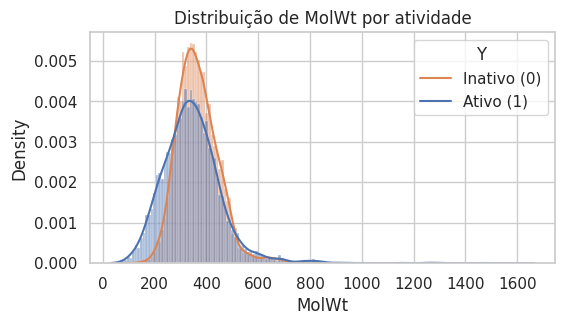

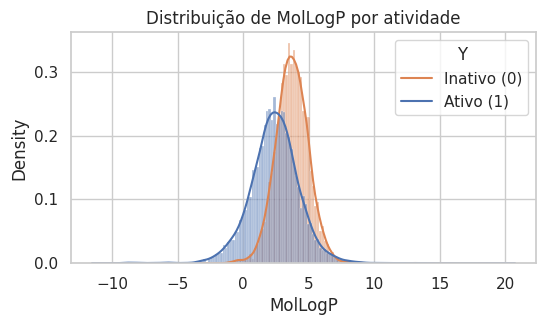

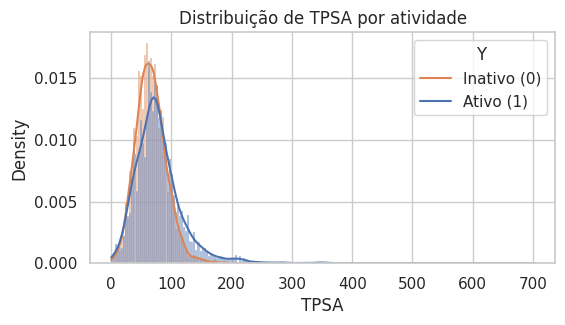

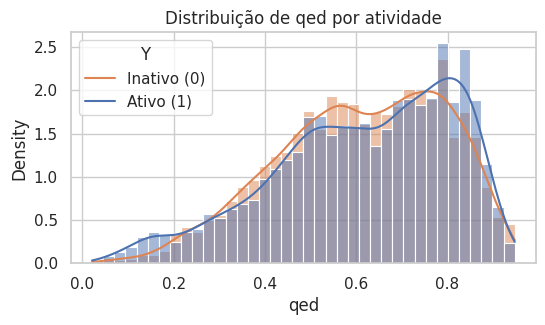

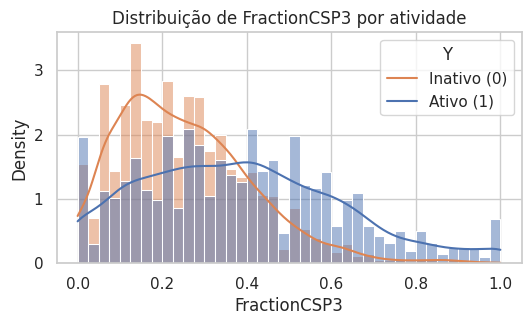

In [ ]:
for feat in ["MolWt","MolLogP","TPSA","qed","FractionCSP3"]:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=feat, hue="Y", kde=True, stat="density", common_norm=False, alpha=0.5)
    plt.title(f'Distribuição de {feat} por atividade')
    plt.legend(title="Y", labels=["Inativo (0)", "Ativo (1)"])
    plt.show()


Com o intuito de aprofundar a análise, buscamos verificar se há distinção entre os fármacos ativados ou inibidos pela enzima. Para tal, refizemos os grafos com separação de compostos ativados/inativados comparando suas propriedades moleculares.

- MolWt (Peso Molecular): A distribuição das moléculas ativas e inativas é muito semelhante, sugerindo que o peso molecular não é um bom indicador de diferença de atividade.
- MolLogP (Lipofilicidade): A distribuição dos compostos inativos se estende para valores mais altos de MolLogP, enquanto as moléculas ativas estão concentradas entre 0 e 5, indicando que lipofilicidade extrema pode impactar negativamente a atividade.
- TPSA (Área de Superfície Polar): A distribuição dos compostos inativos apresenta uma densidade ligeiramente mais alta no pico em comparação com os ativos, mas sem uma diferença drástica. No geral, a similaridade entre as distribuições sugere que TPSA pode não ser um fator determinante para atividade/inatividade.
- QED (Drug-Likeness): As moléculas ativas tendem a se concentrar em valores mais altos de QED, enquanto as inativas apresentam uma distribuição mais ampla, incluindo valores mais baixos (próximos de 0.5). Isso sugere que moléculas com maior drug-likeness têm maior probabilidade de serem ativas.
- FractionCSP3 (Carbonos sp³ – Complexidade Estrutural): As moléculas inativas são predominantemente planas e aromáticas, enquanto as ativas apresentam uma distribuição mais ampla, podendo ser planas ou saturadas, exibindo estruturas 3D mais diversas.


Em suma os resultados indicam que MolLogP e QED parecem influenciar a atividade dos compostos, enquanto MolWt e TPSA não apresentam diferenças significativas entre moléculas ativas e inativas. A fração de carbonos sp³ sugere que moléculas ativas podem ter maior diversidade estrutural, o que pode impactar sua interação com a enzima.


De modo a verificar, com testes estaatísticos,  se diferenças nas propriedades físico químicas de compostos ativados e inativados eram significativos usou-se o teste não paramétrico de Mann Whitney.

MolWt: U=22533316.5, p=3.32e-52


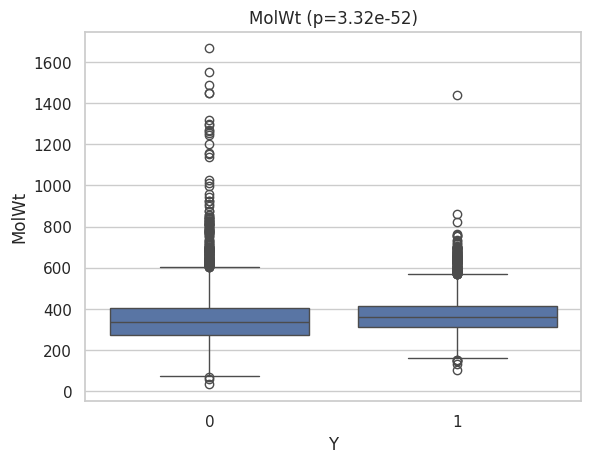

MolLogP: U=28547472.5, p=0.00e+00


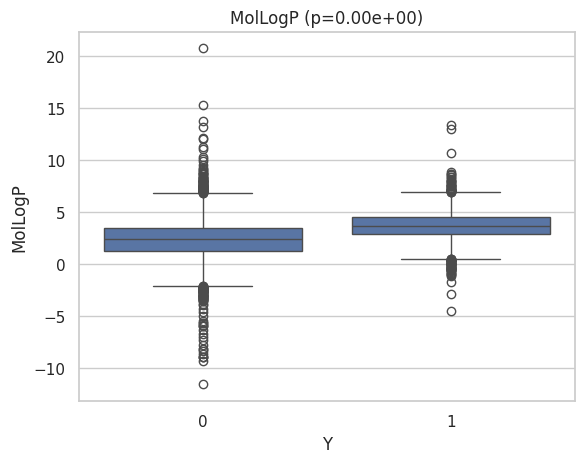

TPSA: U=16121661.5, p=5.54e-62


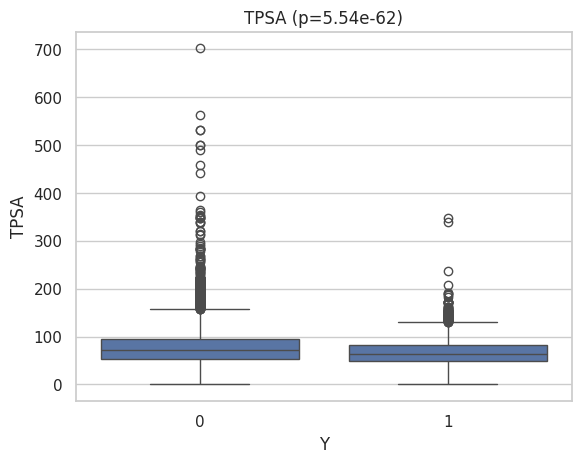

qed: U=18761174.0, p=4.40e-04


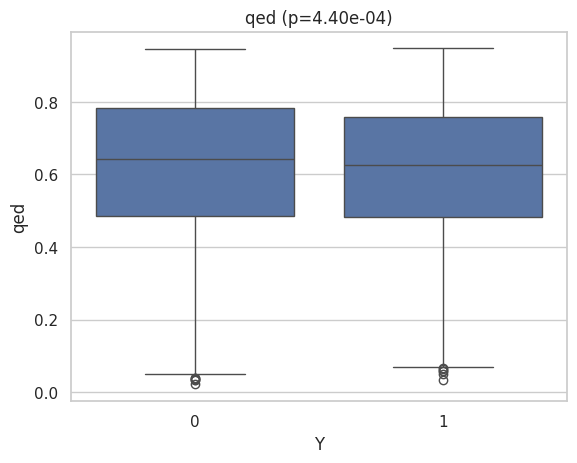

FractionCSP3: U=12843698.5, p=3.65e-237


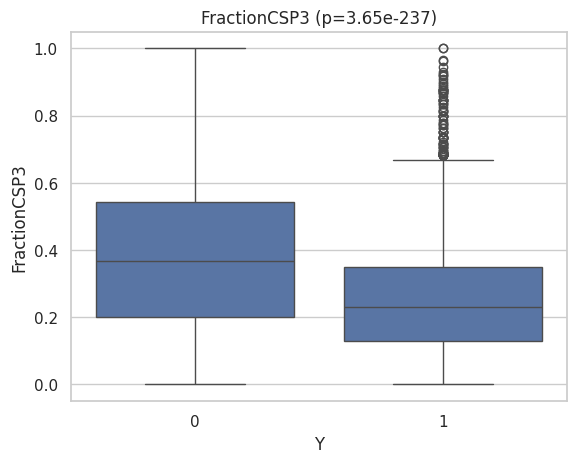

In [ ]:
for feat in ["MolWt","MolLogP","TPSA","qed","FractionCSP3"]:
    ativo = df.loc[df.Y==1, feat]
    inativo = df.loc[df.Y==0, feat]
    stat, p = mannwhitneyu(ativo, inativo, alternative="two-sided")
    print(f"{feat}: U={stat:.1f}, p={p:.2e}")
    sns.boxplot(x="Y", y=feat, data=df)
    plt.title(f"{feat} (p={p:.2e})")
    plt.show()

O valor p (3.32e-52) para o peso molecular (MolWt) indica diferenças significativas entre compostos ativos e inativos. Contudo, as medianas de ambos são quase idênticas, sugerindo que o grande número de outliers presentes pode ser o principal responsável pelo valor p tão baixo. Isso indica que, para valores extremos, o peso molecular pode ter um impacto mais relevante na atividade do composto.

Apesar de um p-valor de 0 indicar que estatisticamente não há diferença significativa na lipofilicidade (MolLogP) entre compostos ativos e inativos, a similaridade das distribuições pode ter contribuído para essa ausência de diferença, ao menos dentro deste conjunto de dados específico.

O valor p de TPSA (5.54e-62) indica diferenças significativas entre os dois grupos. No entanto, como a mediana da polaridade é muito semelhante em ambos, isso sugere que a influência da polaridade na atividade/inatividade do composto ocorre principalmente nos valores mais extremos, enquanto para a maioria dos casos, esse fator não é decisivo.

O valor p de QED (4.40e-40) implica diferenças estatisticamente significativas entre ambos os grupos. Apesar das medianas e variâncias serem muito similares, a significância provavelmente se deve à concentração de valores em certas faixas, o que pode ter alterado a distribuição sem modificar as medidas centrais de forma perceptível.

O p-valor extremamente baixo (3.65e-237) indica uma diferença estatística robusta entre os grupos de compostos ativos e inativos em relação à FractionCSP3. No entanto, essa significância parece estar fortemente influenciada pela presença de outliers, especialmente nos compostos inativos. O boxplot mostra que os compostos inativos apresentam uma gama maior de valores extremos, o que pode estar distorcendo a análise estatística e contribuindo para um p-valor tão pequeno. Embora as medianas dos grupos sejam distintas, essa discrepância parece ser impulsionada principalmente pelos valores mais elevados que aparecem como outliers no grupo inativo.

Em resumo, a maioria dessas propriedades parece ter um impacto mais significativo nos valores extremos dos compostos, enquanto, na faixa mediana, a influência é menos evidente. Isso pode indicar que, em condições normais, essas características não são determinantes para a ativação/inativação dos compostos. No entanto, quando os valores estão em níveis muito altos ou baixos, começam a ter um papel mais relevante, possivelmente influenciando a interação com a coenzima CYP2C19 e modificando a atividade biológica do composto.









De modo a verificar a influencia de uma das variáveis sobre as outra para compostos ativados e inativados utilizou-se o sns pair plot.


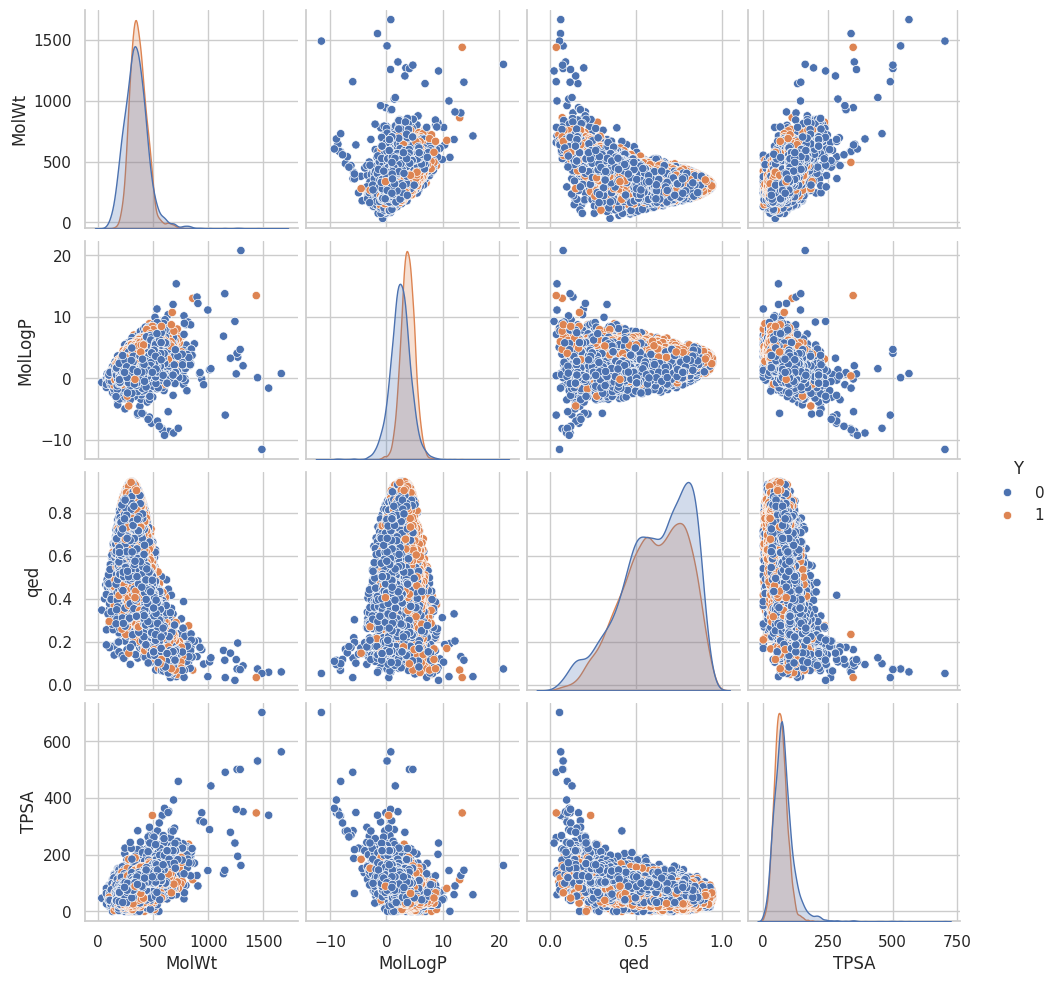

In [ ]:
sns.pairplot(df, vars=["MolWt","MolLogP","qed","TPSA"], hue="Y", diag_kind="kde")
plt.show()



A distribuição dos pontos em QeD vs outra variável se assemelha muito com a sua distribuição de cada uma das variáveis. Seria de se esperar uma vez que o QED é um agregado que já leva em consideração muitos desses fatores.

Para além disso não se verificou nenhum padrão específico e nem formação de clusters específicos para ativos e inativos. Sendo as conclusões iguais aos que se podia extrair com os grafos originais de distribuição.


# **Estudo dos grupos funcionais**:

De seguido quisemos verificar os 10 grupos funcionais mais communs dentro dos nossos compostos. Isso é de grande importância uma vez que o grupo funcional define as propriedades das moléculas. No nosso caso como o fármaco pode interagir com o cyp2c19. Influenciando muitas das propriedades que tinhamos visto acima.

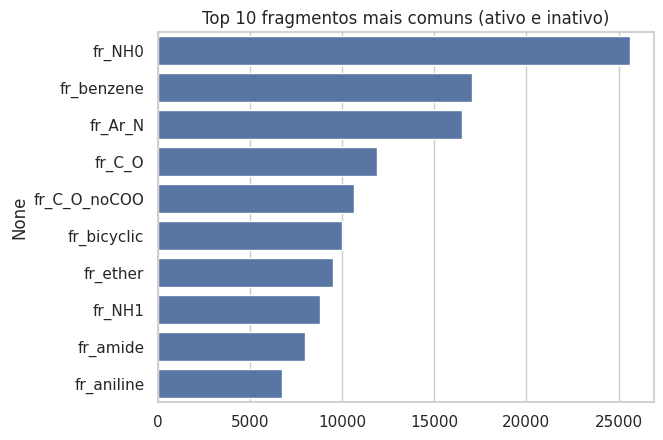

In [ ]:
frags = [c for c in df.columns if c.startswith("fr_")]
top10 = df[frags].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 fragmentos mais comuns (ativo e inativo)")
plt.show()


O resultado : NHO, benzene, Ar_N, C_O , C_O_noCOO , bicyclic, ether, NH1 , amide , aniline. São de larga presença em fármacos.

- Benzeno e Ar_N (Aminas aromáticas) → Comuns em estruturas bioativas devido à estabilidade e capacidade de interagir com proteínas.
- C_O e C_O_noCOO (Grupos carbonila) → Presentes em cetonas, aldeídos e ácidos carboxílicos, essenciais para interações químicas e metabolismo.
- Bicíclicos → Estruturas rígidas que podem melhorar a seletividade e estabilidade de fármacos.
- Éteres → Influenciam solubilidade e permeabilidade, comuns em anestésicos e compostos bioativos.
- NH1 (Aminas secundárias) e Amidas (NH0)→ Importantes para ligação de hidrogênio e interações com receptores biológicos.
- Anilina → Presente em muitos fármacos devido à sua capacidade de formar interações específicas com biomoléculas.




In [ ]:
top10_ativos = df[frags][df.Y==1].sum().sort_values(ascending=False).head(10)
top10_inativos = df[frags][df.Y==0].sum().sort_values(ascending=False).head(10)

print(top10_ativos)
print(top10_inativos)


fr_NH0          11441.0
fr_benzene       9552.0
fr_Ar_N          7887.0
fr_C_O           5210.0
fr_C_O_noCOO     5075.0
fr_NH1           4538.0
fr_ether         4454.0
fr_bicyclic      4242.0
fr_amide         3732.0
fr_halogen       3616.0
dtype: float64
fr_NH0          14180.0
fr_Ar_N          8607.0
fr_benzene       7503.0
fr_C_O           6696.0
fr_bicyclic      5768.0
fr_C_O_noCOO     5574.0
fr_ether         5065.0
fr_NH1           4286.0
fr_amide         4243.0
fr_aniline       3164.0
dtype: float64


Aprofundamos o estudo, verificando a ocorrência dos grupos funcionais presentes nos químicos ativos e inativos.

Interpretação Geral:
- NH0 (Aminas primárias) → Mais frequentes em inativos (14.180) do que em ativos (11.441), sugerindo que esse grupo pode não ser um forte indicador de atividade.
- Benzeno e Ar_N (Aminas aromáticas) → Mais comuns em ativos, indicando que estruturas aromáticas podem estar associadas à bioatividade.
- C_O e C_O_noCOO (Grupos carbonila) → Presentes em ambos os grupos, mas ligeiramente mais frequentes em inativos, sugerindo que carbonilas podem não ser um fator determinante para atividade.
- Bicíclicos → Mais comuns em inativos (5.768) do que em ativos (4.242), o que pode indicar que estruturas rígidas não favorecem a atividade em certos casos.
- Éteres → Frequência semelhante entre ativos e inativos, sugerindo que esse grupo funcional não tem um impacto significativo na atividade.
- Amidas → Mais presentes em inativos, o que pode indicar que esse grupo não favorece a interação com a enzima alvo.
- Halogênios → Aparecem apenas nos ativos, o que pode sugerir que a presença de halogênios pode estar associada à atividade biológica.
- Anilinas → Aparecem apenas nos inativos, sugerindo que esse grupo pode estar mais associado a compostos que não apresentam atividade.


Em suma os grupos funcionais benzeno, Ar_N e halogênios parecem estar mais associados a moléculas ativas, enquanto NH0, amidas, bicíclicos e anilinas são mais comuns em inativos. Isso sugere que estruturas aromáticas e halogenadas podem favorecer a atividade, enquanto aminas primárias e amidas podem estar mais presentes em compostos inativos.

De modo a encontrar os grupos funcionais mais diferenciados entre os compostos ativos e inativos mediu-se a distãncia euclidiana entre eles. Ao ordenar em listas dos compostos ativos e inativos selecionou os que tinham maior diferença de posição dentro de cada uma das listas. Dando os seguintes 10 mais diferenciados:


In [ ]:
from math import sqrt
frag_ord_ativos=df[frags][df.Y==1].sum().sort_values(ascending=False)
frag_ord_inativos= df[frags][df.Y==0].sum().sort_values(ascending=False)
distancias={}
for frag in frags:
  place_ativos= frag_ord_ativos.index.get_loc(frag)
  place_inativos=frag_ord_inativos.index.get_loc(frag)
  distancia=int(sqrt((place_ativos-place_inativos)**2))
  distancias[frag]=distancia
top10_diferenciados=sorted(distancias.keys())[:11]


In [ ]:
top10_diferenciados

['fr_Al_COO',
 'fr_Al_OH',
 'fr_Al_OH_noTert',
 'fr_ArN',
 'fr_Ar_COO',
 'fr_Ar_N',
 'fr_Ar_NH',
 'fr_Ar_OH',
 'fr_COO',
 'fr_COO2',
 'fr_C_O']

- Grupos carboxila e derivados (COO, COO2, Ar_COO, Al_COO) → Comuns em ácidos carboxílicos e ésteres, que influenciam solubilidade e interações biológicas.
- Grupos hidroxila (Al_OH, Al_OH_noTert, Ar_OH) → Podem afetar solubilidade e capacidade de formar ligações de hidrogênio, impactando permeabilidade e metabolismo.
- Grupos nitrogenados aromáticos (ArN, Ar_N, Ar_NH) → Comuns em aminas aromáticas, que podem influenciar a bioatividade e interações com proteínas.
- Grupos carbonila (C_O) → Presentes em cetonas, aldeídos e amidas, que podem ser essenciais para interações químicas e metabolismo.

Isso é importante pois permite revelar os compostos que são mais presentes em um e em outro de modo a poder descriminar quais são mais relevantes para compor um composto ativo vs inativo. As contagens podem ser vistas no grafo a seguir.


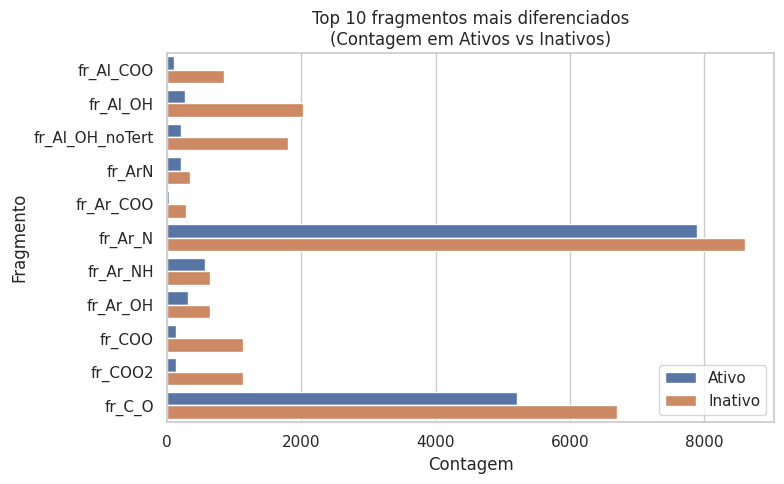

In [ ]:
ativos   = df.loc[df.Y==1, top10_diferenciados].sum()
inativos = df.loc[df.Y==0, top10_diferenciados].sum()

# Monta um DataFrame “long” para o seaborn
plot_df = pd.DataFrame({
    'fragmento': top10_diferenciados * 2,
    'contagem': list(ativos.values) + list(inativos.values),
    'classe':     ['Ativo']*len(top10_diferenciados) + ['Inativo']*len(top10_diferenciados)
})

plt.figure(figsize=(8,5))
sns.barplot(data=plot_df, x='contagem', y='fragmento', hue='classe')
plt.title("Top 10 fragmentos mais diferenciados\n(Contagem em Ativos vs Inativos)")
plt.xlabel("Contagem")
plt.ylabel("Fragmento")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Para analisar quais fragmentos químicos são mais comuns em compostos ativos ou inativos, calculou-se a diferença de proporção entre os dois grupos. Primeiro, determinou-se o número total de compostos ativos e inativos, seguido do cálculo da frequência relativa de cada fragmento em ambos os grupos. Em seguida, comparou-se essas proporções para identificar quais fragmentos aparecem significativamente mais em um grupo do que no outro.

Os fragmentos foram ordenados de acordo com essa diferença, e um gráfico de barras foi gerado para visualizar os resultados. Fragmentos com valores positivos são mais frequentes em compostos ativos, enquanto aqueles com valores negativos aparecem mais em compostos inativos. Essa análise permite identificar padrões estruturais que podem influenciar a bioatividade dos compostos, ajudando a entender quais grupos funcionais podem estar associados à atividade ou inatividade.


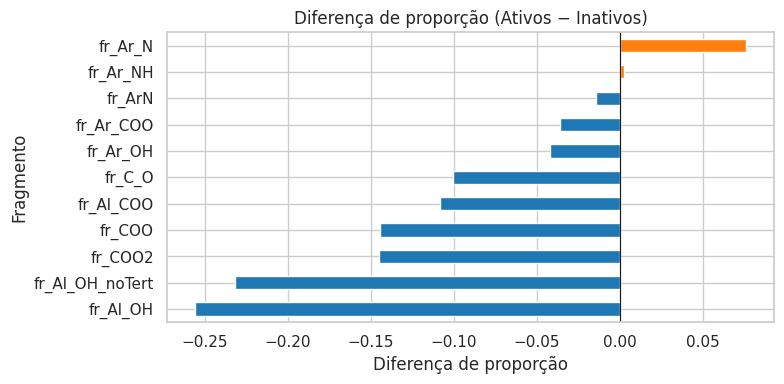

In [ ]:
# Número total de ativos/inativos
n_ativos   = (df.Y==1).sum()
n_inativos = (df.Y==0).sum()

# Proporção
prop_ativos   = ativos   / n_ativos
prop_inativos = inativos / n_inativos

# Diferença (ativo – inativo)
diff = (prop_ativos - prop_inativos).loc[top10_diferenciados]

plt.figure(figsize=(8,4))
diff.sort_values().plot(kind='barh', color=diff.sort_values().apply(lambda v: 'tab:blue' if v<0 else 'tab:orange'))
plt.axvline(0, color='k', linewidth=0.8)
plt.title("Diferença de proporção (Ativos − Inativos)")
plt.xlabel("Diferença de proporção")
plt.ylabel("Fragmento")
plt.tight_layout()
plt.show()


# **Segunda abordagem (estatística de presença/ausência)**:

Esta função realiza uma análise estatística para identificar quais fragmentos químicos estão mais associados à atividade ou inatividade dos compostos. Primeiro, verifica-se a presença ou ausência de cada fragmento nas moléculas ativas e inativas, calculando a proporção de ocorrência em cada grupo. Em seguida, essas proporções são comparadas para medir a diferença entre ativos e inativos. Para garantir que essa diferença seja estatisticamente relevante, aplica-se o teste exato de Fisher, que avalia se a presença do fragmento tem uma associação significativa com a atividade. Após essa análise, os fragmentos são ordenados com base na significância estatística (p-value) e na magnitude da diferença entre os grupos, permitindo identificar aqueles que têm maior impacto na distinção entre ativos e inativos.  

Essa abordagem difere do modelo anterior, que apenas comparava a frequência dos fragmentos entre ativos e inativos, medindo a distância euclidiana entre suas posições nas listas ordenadas. Embora útil para identificar fragmentos diferenciados, essa técnica não verificava se as diferenças observadas eram estatisticamente significativas. Já o modelo atual vai além, pois utiliza um teste estatístico para garantir que os fragmentos identificados realmente influenciam a atividade dos compostos. Além disso, considera a presença binária dos fragmentos, garantindo que a análise seja baseada na ocorrência real e não apenas na frequência absoluta. Ao ordenar os fragmentos com base na significância estatística, prioriza-se aqueles que têm um impacto real na distinção entre ativos e inativos, tornando a análise mais robusta e confiável.

• count_active e count_inactive: número de moléculas que contêm o fragmento em cada classe. </br>
• prop_active = count_active/total_ativos, e prop_inactive = count_inactive/total_inativos.</br>
• diff = prop_active − prop_inactive (diferença de proporções).</br>
• odds_ratio: razão de chances de presença em ativos vs. inativos.</br>
• p_value do teste exato de Fisher para avaliar a significância dessa associação.

In [ ]:
results = []
for frag in frags:
    # Presença binária: 1 se aparece >=1 vez, 0 caso contrário
    pres = df[frag] > 0

    # Contagens de presença/ausência em cada classe
    a = int(((df.Y == 1) & pres).sum())     # ativos com frag
    b = int(((df.Y == 1) & ~pres).sum())    # ativos sem frag
    c = int(((df.Y == 0) & pres).sum())     # inativos com frag
    d = int(((df.Y == 0) & ~pres).sum())    # inativos sem frag

    # Proporções
    prop_a = a / n_ativos
    prop_i = c / n_inativos
    diff   = prop_a - prop_i

    # Tabela e Fisher
    table = [[a, b], [c, d]]
    odds_ratio, p_value = fisher_exact(table)

    results.append({
        'frag': frag,
        'count_active': a,
        'count_inactive': c,
        'prop_active': prop_a,
        'prop_inactive': prop_i,
        'diff': diff,
        'odds_ratio': odds_ratio,
        'p_value': p_value
    })

stats_df = pd.DataFrame(results)
# Ordena por p-valor (asc) e depois por |diff| (desc)
stats_df['abs_diff'] = stats_df['diff'].abs()

#Ordena primeiro por p-value crescente e, em seguida, por abs_diff decrescente
stats_df = stats_df.sort_values(by=['p_value', 'abs_diff'], ascending=[True, False])

#(Opcional) Remove a coluna auxiliar se não precisar mais
# stats_df = stats_df.drop(columns=['abs_diff'])

# Reset do índice
stats_df = stats_df.reset_index(drop=True)

# top 20
stats_df.head(20)

,frag,count_active,count_inactive,prop_active,prop_inactive,diff,odds_ratio,p_value,abs_diff
0,fr_benzene,5402,4896,0.930737,0.729766,0.200971,4.976052,2.079730e-204,0.200971
1,fr_COO2,102,911,0.017574,0.135788,-0.118214,0.113850,5.876890e-149,0.118214
2,fr_COO,102,909,0.017574,0.135490,-0.117916,0.114140,1.117466e-148,0.117916
3,fr_Al_OH_noTert,177,991,0.030496,0.147712,-0.117216,0.181496,9.693116e-124,0.117216
4,fr_Al_OH,231,1076,0.039800,0.160382,-0.120581,0.216995,1.445296e-116,0.120581
5,fr_Al_COO,74,685,0.012750,0.102102,-0.089352,0.113572,3.464984e-112,0.089352
6,fr_piperdine,389,1203,0.067023,0.179311,-0.112289,0.328792,1.205247e-82,0.112289
7,fr_Ndealkylation2,435,1255,0.074948,0.187062,-0.112114,0.352101,4.375260e-78,0.112114
8,fr_halogen,2088,1455,0.359752,0.216873,0.142879,2.028999,6.072369e-70,0.142879
9,fr_sulfide,891,392,0.153515,0.058429,0.095086,2.922508,3.570950e-69,0.095086


Esta análise busca identificar os 10 fragmentos químicos mais diferenciados entre compostos ativos e inativos, comparando suas frequências em cada grupo. Após selecionar os fragmentos com a maior diferença de proporção, suas contagens são organizadas e visualizadas em um gráfico de barras, permitindo observar quais fragmentos são significativamente mais comuns em um grupo do que no outro. Isso ajuda a destacar padrões estruturais que podem influenciar a bioatividade dos compostos, fornecendo insights sobre quais grupos funcionais podem estar associados à atividade ou inatividade.


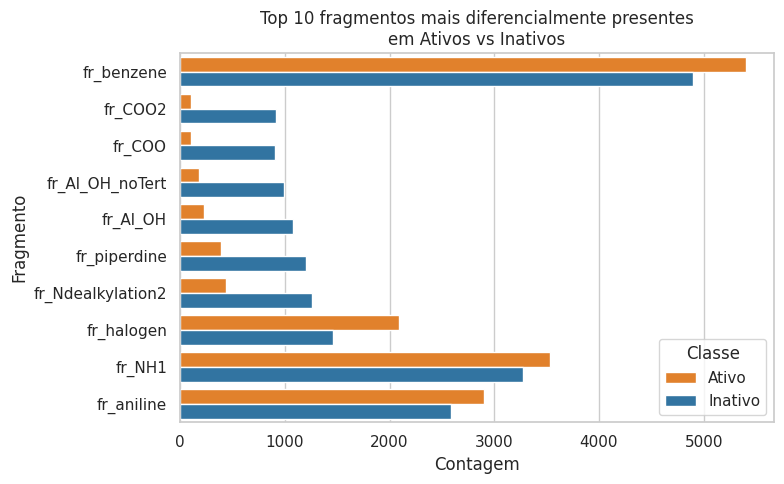

In [ ]:
# 1) Pega os 10 fragmentos com maior diferença absoluta de proporção
top10_diff = stats_df.nlargest(10, 'abs_diff')['frag'].tolist()

# 2) Prepara DataFrame longo com contagens para esses fragmentos
sub = stats_df[stats_df['frag'].isin(top10_diff)]
plot_df = pd.melt(
    sub,
    id_vars='frag',
    value_vars=['count_active', 'count_inactive'],
    var_name='classe',
    value_name='count'
)
plot_df['classe'] = plot_df['classe'].map({
    'count_active': 'Ativo',
    'count_inactive': 'Inativo'
})

# 3) Plota barras lado a lado
plt.figure(figsize=(8,5))
sns.barplot(
    data=plot_df,
    x='count',
    y='frag',
    hue='classe',
    palette={'Ativo':'tab:orange','Inativo':'tab:blue'}
)
plt.title("Top 10 fragmentos mais diferencialmente presentes\nem Ativos vs Inativos")
plt.xlabel("Contagem")
plt.ylabel("Fragmento")
plt.legend(title="Classe")
plt.tight_layout()
plt.show()


Os 10 fragmentos químicos mais diferenciados entre compostos ativos e inativos são benzene, COO2 , COO , Al_Oh_NOtERT , Al_OH, piperdine , Ndealkyation2 , halogen , NH1 , aniline

- Benzeno → Estrutura aromática comum em fármacos, frequentemente associada à estabilidade e interações biológicas.
- COO2 e COO (Grupos carboxila e derivados) → Influenciam solubilidade e interações químicas, podendo impactar a absorção e biodisponibilidade.
- Al_OH e Al_OH_noTert (Grupos hidroxila alifáticos) → Podem afetar solubilidade e capacidade de formar ligações de hidrogênio, influenciando permeabilidade e metabolismo.
- Piperidina → Estrutura cíclica nitrogenada presente em muitos fármacos, podendo influenciar a bioatividade e interações com proteínas.
- Ndealkylation2 → Indica a presença de grupos suscetíveis à desalquilação, um processo metabólico relevante na modificação de fármacos.
- Halogênios → Comuns em compostos bioativos, podem aumentar a estabilidade e influenciar interações moleculares.
- NH1 (Aminas secundárias) → Importantes para ligação de hidrogênio e interações com receptores biológicos.
- Anilina → Grupo aromático nitrogenado que pode influenciar a reatividade e interações biológicas.


In [ ]:
stats_df.reindex(stats_df['abs_diff'].nlargest(10).index)


,frag,count_active,count_inactive,prop_active,prop_inactive,diff,odds_ratio,p_value,abs_diff
0,fr_benzene,5402,4896,0.930737,0.729766,0.200971,4.976052,2.079730e-204,0.200971
8,fr_halogen,2088,1455,0.359752,0.216873,0.142879,2.028999,6.072369e-70,0.142879
4,fr_Al_OH,231,1076,0.039800,0.160382,-0.120581,0.216995,1.445296e-116,0.120581
12,fr_NH1,3531,3276,0.608374,0.488299,0.120074,1.627902,2.695192e-41,0.120074
1,fr_COO2,102,911,0.017574,0.135788,-0.118214,0.113850,5.876890e-149,0.118214
2,fr_COO,102,909,0.017574,0.135490,-0.117916,0.114140,1.117466e-148,0.117916
3,fr_Al_OH_noTert,177,991,0.030496,0.147712,-0.117216,0.181496,9.693116e-124,0.117216
13,fr_aniline,2898,2584,0.499311,0.385154,0.114157,1.591968,1.213538e-37,0.114157
6,fr_piperdine,389,1203,0.067023,0.179311,-0.112289,0.328792,1.205247e-82,0.112289
7,fr_Ndealkylation2,435,1255,0.074948,0.187062,-0.112114,0.352101,4.375260e-78,0.112114


De modo a visualizar os 10 fragmentos químicos com maior diferença de proporção entre compostos ativos e inativos. Primeiro, seleciona os fragmentos cuja diferença absoluta entre os dois grupos é mais significativa, ordenando-os de forma decrescente.

Em seguida, atribui cores às barras com base na direção da diferença: laranja para fragmentos mais comuns em ativos e azul para fragmentos mais frequentes em inativos. O gráfico exibe a magnitude dessa diferença, permitindo visualizar quais fragmentos estão mais associados à atividade ou inatividade dos compostos.

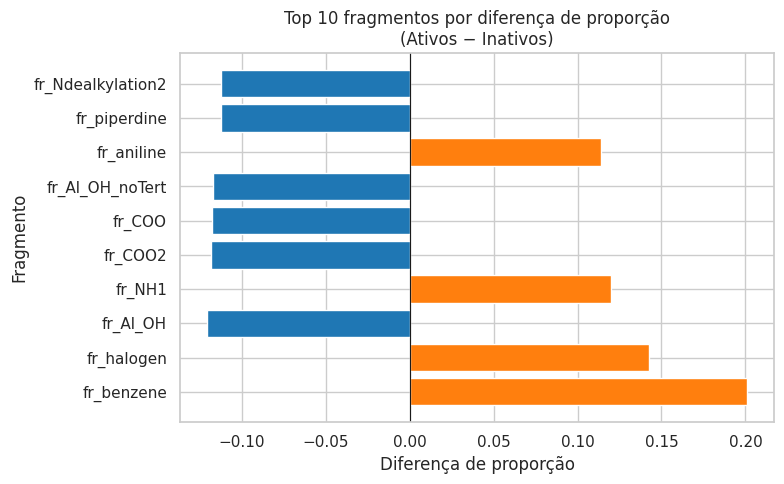

In [ ]:
top10_diff = stats_df.reindex(stats_df['abs_diff'].nlargest(10).index)

plt.figure(figsize=(8,5))
colors = top10_diff['diff'].apply(lambda v: 'tab:orange' if v>0 else 'tab:blue')
plt.barh(top10_diff['frag'], top10_diff['diff'], color=colors)
plt.axvline(0, color='k', linewidth=0.8)
plt.title("Top 10 fragmentos por diferença de proporção\n(Ativos − Inativos)")
plt.xlabel("Diferença de proporção")
plt.ylabel("Fragmento")
plt.tight_layout()
plt.show()

Barras azuis à esquerda indicam fragmento enriquecido em inativos. Sendo estes Ndealkylation2, pierdine, Al_OH_noTert , COO , COO2, Al_OH. Com todos tendo uma diferença absouta próxima de -0.11.

Enquanto que as barras laranjas à direita indicam fragmento enriquecido em ativos. Sendo estes alanine , NH1 , halogen e benzene. Com diferença absoluta de 0.11, 0.12, 0.14, 0.20 respetivamente.

Apesar de haver diferenças, não são de grande dimensão o que pode indicar que o grupo funcional apesar de atribuir as características de uma molécula pode não ser um fator, por si só, tão decisivo na ativação/inativação pela enzima cyp2c19.





De modo a visulizar quais fragmentos químicos aparecem significativamente mais em compostos ativos ou inativos, e com que confiança estatística. Fez-se um volcano plot:

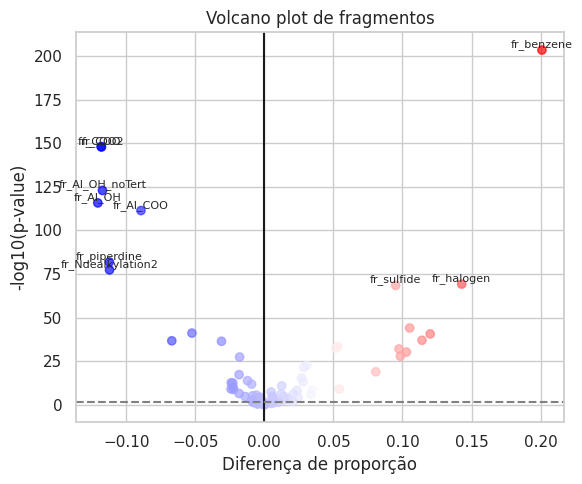

In [ ]:
stats_df['neg_logp'] = -np.log10(stats_df['p_value'])

# Identifica os 5 pontos com maior neg_logp
top10 = stats_df.nlargest(10, 'neg_logp')

plt.figure(figsize=(6,5))
sc = plt.scatter(
    stats_df['diff'],
    stats_df['neg_logp'],
    c=stats_df['diff'],
    cmap='bwr',
    alpha=0.7
)

# Linhas de corte
plt.axvline(0, color='k')
plt.axhline(-np.log10(0.05), color='gray', ls='--')

# Anotações dos 5 pontos mais altos
for _, row in top10.iterrows():
    plt.text(
        row['diff'], row['neg_logp'],
        row['frag'],
        fontsize=8,
        ha='center',
        va='bottom'
    )

plt.xlabel("Diferença de proporção")
plt.ylabel("-log10(p-value)")
plt.title("Volcano plot de fragmentos")
plt.tight_layout()
plt.show()


x = diff (diferença de proporção entre ativos e inativos)

y = −log10(p_value) do Fisher’s test

Pode se chegar às mesmas conclusões que foram vistas previamente com o gráfico de barras. Apesar da significância estatística exibida para os fragmentos não acreditamos que sejam únicamente suficientes para justificar a atividade/inatividade por parte da enzima.

# Correlações:

De modo a descobrir quais variáveis são estatisticamente mais significantes para a ativação/iantivação de um fármaco recorreu-se à análise de correlações. Para medir a relação entre cada variável e a atividade do fármaco, utilizou-se a correlação ponto-biserial, que é adequada para avaliar a associação entre uma variável contínua e uma variável binária (ativa/inativa). As correlações foram calculadas e ordenadas, destacando as 10 variáveis mais positivamente correlacionadas com a atividade e as 10 mais negativamente correlacionadas. Nesse caso foram removidos os fragmentos uma vez que não são variáveis contínuas.



Top 10 positivamente correlacionados com Y:
BCUT2D_LOGPLOW            0.219475
SlogP_VSA12               0.227716
PEOE_VSA6                 0.234896
EState_VSA7               0.237374
NumAromaticCarbocycles    0.284177
NumAromaticRings          0.295740
VSA_EState6               0.309892
SlogP_VSA6                0.317497
SMR_VSA7                  0.328251
MolLogP                   0.370447
dtype: float64

Top 10 negativamente correlacionados com Y:
FractionCSP3               -0.309339
SlogP_VSA2                 -0.263371
NumSaturatedRings          -0.232168
NumSaturatedHeterocycles   -0.223257
SMR_VSA4                   -0.214838
NumAliphaticRings          -0.188156
NumAliphaticHeterocycles   -0.186437
NHOHCount                  -0.178401
NumHDonors                 -0.172118
TPSA                       -0.170972
dtype: float64


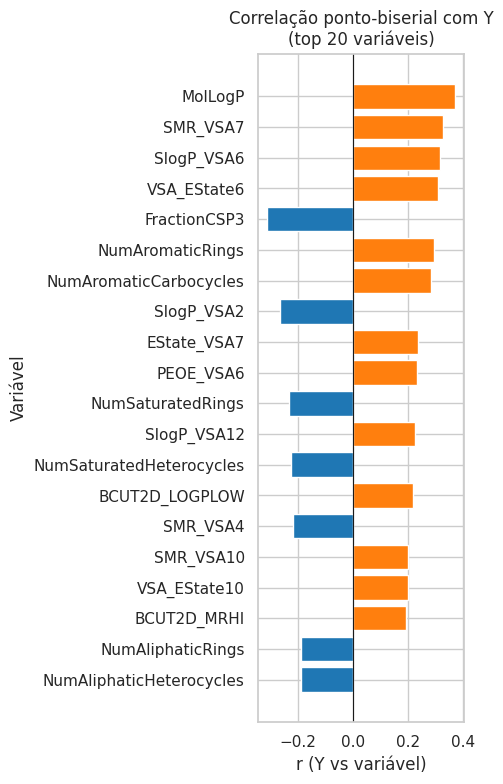

In [ ]:
cols_sem_var=[col for col in df.columns if df[col].var()==0]
df = df.drop(columns=cols_sem_var)

#Identifique só as colunas contínuas (float) descartando os fr_ (que são contagens inteiras)
cont_cols = [
    c for c, dt in df.dtypes.items()
    if (dt in ['float64', 'int64']) and (c not in ['ids','smiles','Y'])
    and not c.startswith('fr_')
]

# 2) Calcule ponto-biserial
corrs = {}
ps = {}
for col in cont_cols:
    # dropna em X e Y simultaneamente
    valid = df[[col, 'Y']].dropna()
    r, p = pointbiserialr(valid['Y'], valid[col])
    corrs[col] = r
    ps[col] = p

corrs = pd.Series(corrs).sort_values()
ps    = pd.Series(ps)

# 3) Mostre as top correlações positivas e negativas
print("Top 10 positivamente correlacionados com Y:")
print(corrs.tail(10))
print("\nTop 10 negativamente correlacionados com Y:")
print(corrs.head(10))

#Barplot das correlações (absolutas) para as 20 maiores
top20 = corrs.abs().nlargest(20).index
vals  = corrs[top20]

#  Define cor laranja para r>0 (positivas/ativas) e azul para r<0
colors = ['tab:orange' if v > 0 else 'tab:blue' for v in vals]

#Plota com matplotlib
plt.figure(figsize=(5,8))
plt.barh(top20, vals, color=colors)
plt.axvline(0, color='k', linewidth=0.8)
plt.title("Correlação ponto-biserial com Y\n(top 20 variáveis)")
plt.ylabel("Variável")
plt.xlabel("r (Y vs variável)")
plt.gca().invert_yaxis()  # opcional: inverte para que a maior fique no topo
plt.tight_layout()
plt.show()

A descrição de cada uma das variáveis segue:

Variáveis Relacionados à Lipofilicidade e Área de Superfície:
- MolLogP → Logaritmo do coeficiente de partição (LogP), indicando lipofilicidade. Valores mais altos sugerem maior hidrofobicidade.
- SlogP_VSA6 → Um descritor que mapeia a área de superfície molecular com base nos valores de LogP, ajudando a avaliar regiões hidrofóbicas.
- SMR_VSA7, SMR_VSA10 → Descritores de área de superfície ponderados pela refratividade molar, que está relacionada à polarizabilidade molecular.
- VSA_EState6 → Um descritor híbrido que combina área de superfície molecular com propriedades do estado eletrônico.
- EState_VSA7 → Outro descritor baseado no estado eletrônico e na área de superfície, útil para prever interações moleculares.

Descritores Relacionados à Aromaticidade e Estruturas Cíclicas:
- Num_AromaticRings → Número de anéis aromáticos na molécula, frequentemente associado à bioatividade e estabilidade.
- NumAromaticCarbocycles → Número de anéis carbocíclicos aromáticos, que podem influenciar a afinidade de ligação com proteínas.

Descritores Relacionados à Carga e Propriedades Eletrônicas:
- PEOE_VSA6 → Um descritor que mapeia a área de superfície molecular com base nas cargas atômicas parciais, útil para avaliar interações eletrostáticas.
- BCUT2D_LOGPLOW, BCUT2D_MRHI → Descritores BCUT, que capturam a diversidade molecular com base em propriedades atômicas como LogP e refratividade molar.

Descritores Relacionados à Saturação e Alifaticidade:
- FractionCSP3 → Fração de átomos de carbono sp³, indicando flexibilidade molecular e estrutura tridimensional.
- NumSaturatedRings, NumSaturatedHeterocycles → Contagem de anéis saturados e heterocíclicos, que afetam a rigidez molecular.
- NumAliphaticRings, NumAliphaticHeterocycles → Contagem de anéis alifáticos e heterocíclicos, influenciando solubilidade e metabolismo.


O gráfico apresentado ilustra a correlação das variáveis com a ativação e inativação dos compostos em relação à enzima CYP2C19. No eixo X, os valores positivos de r (barras laranjas) indicam que, à medida que o valor da variável cresce, há uma maior probabilidade de o composto ser ativo. Em contrapartida, valores negativos de r (barras azuis) apontam para uma maior correlação com a inativação do composto.

O gráfico de barras destaca as 20 variáveis mais significativas estatisticamente. Dentre elas, 13 variáveis apresentam maior probabilidade de estar associadas a um composto ativo, enquanto 7 variáveis demonstram maior probabilidade de estar ligadas a um composto inativo.
Variáveis correlacionadas com compostos ativos (valores positivos de r)
Os compostos que possuem valores elevados nessas variáveis tendem a ser mais ativos frente à enzima CYP2C19:
- MolLogP (+0.37) – compostos mais lipofílicos apresentam maior probabilidade de atividade.
- SMR_VSA7, SlogP_VSA6, VSA_EState6 – características físico-químicas relacionadas à área de superfície molecular, cuja elevação favorece a atividade.
- NumAromaticRings (+0.30) – moléculas com um maior número de anéis aromáticos tendem a ser mais ativas.
- Outras variáveis relevantes: NumAromaticCarbocycles, EState_VSA7, PEOE_VSA6, SlogP_VSA12, BCUT2D_LOGPLOW, SMR_VSA10, BCUT2D_MRHI.
Variáveis correlacionadas com compostos inativos (valores negativos de r)
Os compostos que apresentam valores mais altos nessas variáveis tendem a ser menos ativos:
- FractionCSP3 (–0.31) – moléculas com maior fração de carbonos sp³, ou seja, mais tridimensionais, demonstram menor atividade.
- SlogP_VSA2 – um parâmetro lipofílico cuja correlação negativa indica menor probabilidade de ativação.
- NumSaturatedRings, NumSaturatedHeterocycles – moléculas mais saturadas parecem estar mais associadas à inatividade.
- Outras variáveis relevantes: SMR_VSA4, NumAliphaticRings, NumAliphaticHeterocycles.


O gráfico revela uma tendência clara: compostos mais lipofílicos e aromáticos tendem a ser mais ativos, enquanto aqueles mais saturados e alifáticos mostram maior relação com a inatividade. Isso reforça o impacto da lipofilicidade, aromaticidade e complexidade eletrônica na bioatividade frente à CYP2C19.
Caso queira aprofundar, pode explorar se essas correlações têm impacto na biodisponibilidade e metabolismo, bem como investigar interações moleculares que justificam esses padrões.





Ao isolar as três variáveis com maior coeficiente de correlação com Y :

MolLogP (r=0.37) demonstra uma gama mais concentrada de valores de MolLogP no ativo enquanto os inativos têm uma gama mais alargada.
Com isso podemos concluir que a ativação de determinado fármaco é tanto maior quanto maior a sua solubilidade.

As outras duas variáveis não mudam significativamente a sua distribuição nos grafos entre ativos e inativos.
SMR_VSA7 (r=0.32) indica que quanto maior a sua polarizibilidade da molécula maior a sua ativação

SlogP_VSA6 (r=0.31) indica que quanto maior a sua superfície molecular maior a sua ativação



<ipython-input-27-1328712109>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Y', y=feat, data=df, jitter=0.2, alpha=0.5,palette={'1':'tab:orange','0':'tab:blue'})


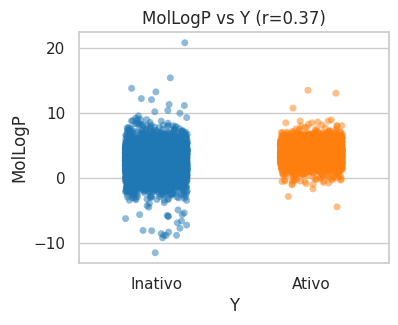

<ipython-input-27-1328712109>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Y', y=feat, data=df, jitter=0.2, alpha=0.5,palette={'1':'tab:orange','0':'tab:blue'})


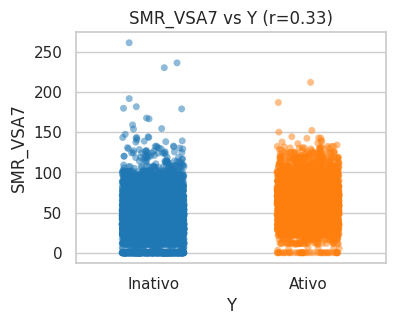

<ipython-input-27-1328712109>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Y', y=feat, data=df, jitter=0.2, alpha=0.5,palette={'1':'tab:orange','0':'tab:blue'})


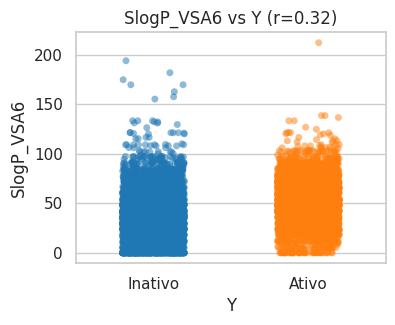

In [ ]:
top3 = corrs.abs().nlargest(3).index
for feat in top3:
    plt.figure(figsize=(4,3))
    sns.stripplot(x='Y', y=feat, data=df, jitter=0.2, alpha=0.5,palette={'1':'tab:orange','0':'tab:blue'})
    plt.title(f"{feat} vs Y (r={corrs[feat]:.2f})")
    plt.xticks([0,1], ["Inativo","Ativo"])
    plt.show()

Construi-se uma matriz de correlação com as 10 variávies com maior coeficiencia de correlação com Y:

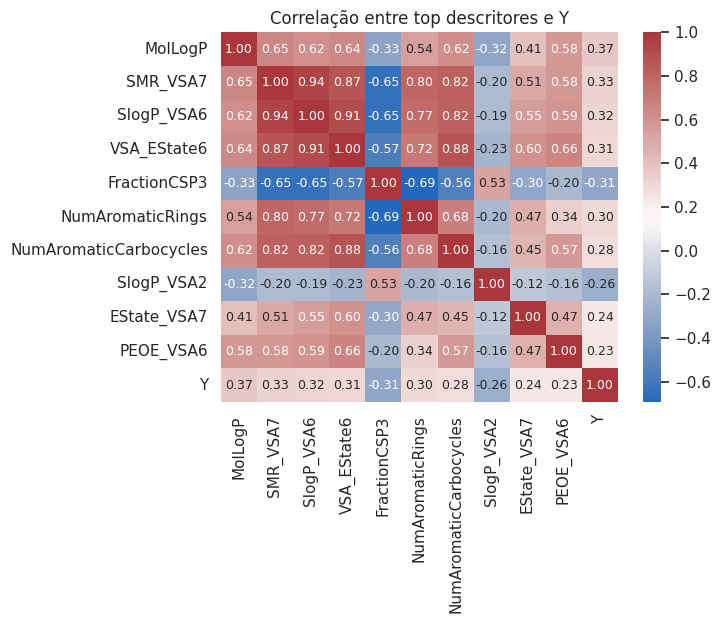

In [ ]:
top_feats = corrs.abs().nlargest(10).index.tolist() + ['Y']
sns.heatmap(df[top_feats].corr(), annot=True, cmap='vlag', fmt=".2f",annot_kws={"fontsize":9})
plt.title("Correlação entre top descritores e Y")
plt.show()



Daqui conseguimos tirar uma conclusão geral de que moléculas mais lipofílicas e aromáticas tendem a ser ativas. Enquanto moléculas mais tridimensionais, saturadas e polares tendem a ser inativas. É importante notar que nenhuma variável isoladamente é suficiente para prever a atividade/inatividade, mas essas correlações indicam tendências importantes.



Construi-se uma matriz de correlação com as 30 variávies com maior variância:

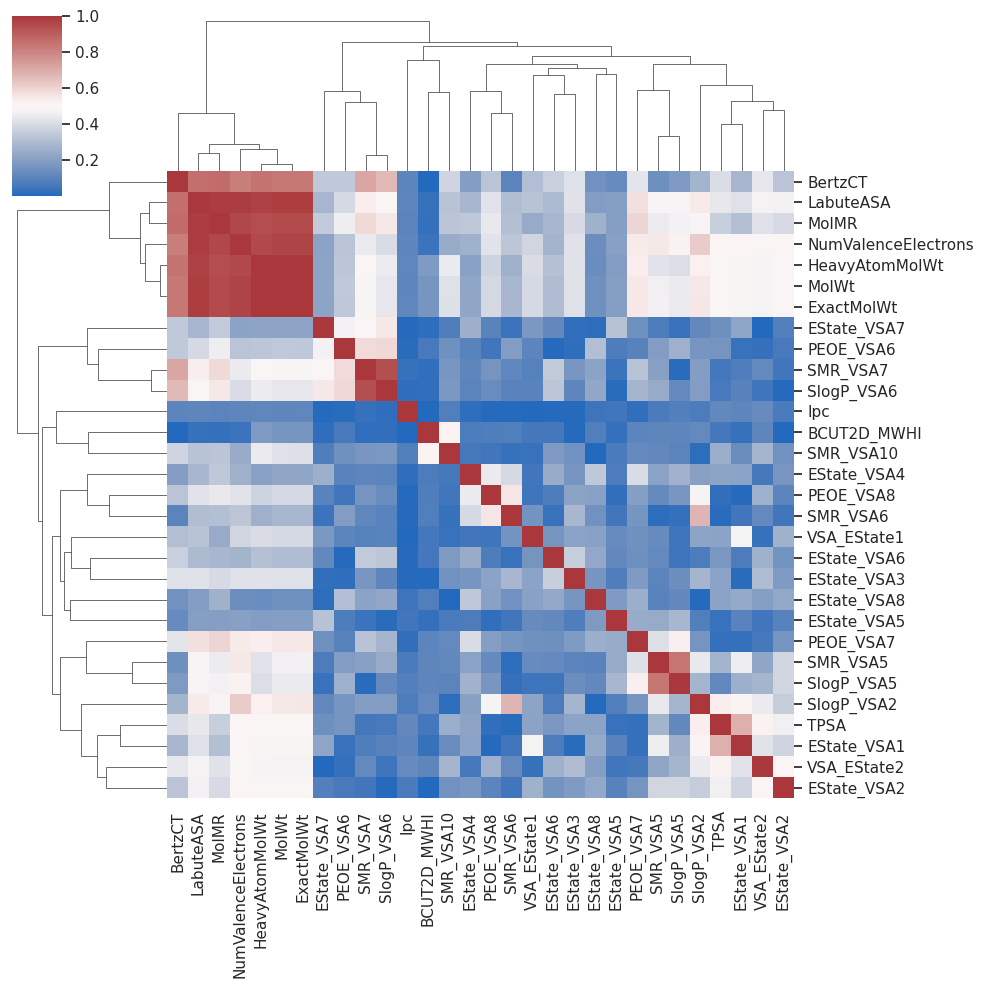

In [ ]:
corr = df.drop(columns=["Y"]).corr().abs()
# seleciona top 30 descritores por variância
top30 = df.var().sort_values(ascending=False).head(30).index
sns.clustermap(corr.loc[top30, top30], cmap="vlag", figsize=(10,10))
plt.show()


Os valores das variâncias podem ser vistos abaixo:

In [ ]:
df[top_feats].corr()

,MolLogP,SMR_VSA7,SlogP_VSA6,VSA_EState6,FractionCSP3,NumAromaticRings,NumAromaticCarbocycles,SlogP_VSA2,EState_VSA7,PEOE_VSA6,Y
MolLogP,1.000000,0.649515,0.615387,0.638837,-0.325102,0.537855,0.622354,-0.315409,0.409821,0.581256,0.370447
SMR_VSA7,0.649515,1.000000,0.940790,0.874244,-0.647235,0.795822,0.817017,-0.196195,0.508143,0.580131,0.328251
SlogP_VSA6,0.615387,0.940790,1.000000,0.913640,-0.652640,0.774498,0.816379,-0.190621,0.550574,0.590205,0.317497
VSA_EState6,0.638837,0.874244,0.913640,1.000000,-0.569273,0.721847,0.875770,-0.227492,0.604238,0.660641,0.309892
FractionCSP3,-0.325102,-0.647235,-0.652640,-0.569273,1.000000,-0.693101,-0.557470,0.527397,-0.298357,-0.202518,-0.309339
NumAromaticRings,0.537855,0.795822,0.774498,0.721847,-0.693101,1.000000,0.683090,-0.204774,0.472298,0.337677,0.295740
NumAromaticCarbocycles,0.622354,0.817017,0.816379,0.875770,-0.557470,0.683090,1.000000,-0.164730,0.448932,0.572908,0.284177
SlogP_VSA2,-0.315409,-0.196195,-0.190621,-0.227492,0.527397,-0.204774,-0.164730,1.000000,-0.118045,-0.163068,-0.263371
EState_VSA7,0.409821,0.508143,0.550574,0.604238,-0.298357,0.472298,0.448932,-0.118045,1.000000,0.466747,0.237374
PEOE_VSA6,0.581256,0.580131,0.590205,0.660641,-0.202518,0.337677,0.572908,-0.163068,0.466747,1.000000,0.234896


#Analise não supervisionada

A análise não supervisionada é um método de aprendizado de máquina onde um modelo explora padrões e estruturas nos dados sem receber rótulos previamente definidos. Tentando descobrir relações, agrupamentos e características ocultas nos dados.

Para standardizar os dados de modo a que sejam mais uniformes para o treino do modelo machine learning utilizou-se o StandardScaler() que garante que osa dados tenham média de 0 e variância unitária.

In [ ]:
# Standardizar os dados
from sklearn.preprocessing import StandardScaler
feat = pd.read_csv("/content/cyp2c19_features.csv")
scaler = StandardScaler()

feat_scaled = scaler.fit_transform(feat)

A redução de dimensão dos dados passa por a realização de um PCA de 2 componentes, para facilitar o trieno de nossos modelos machine learning.

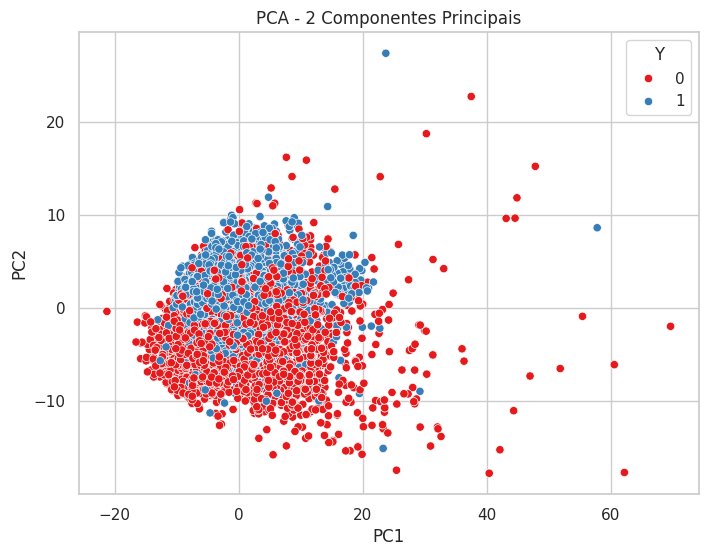

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
feat_pca = pca.fit_transform(feat_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=feat_pca[:,0], y= feat_pca[:,1], hue= out['Y'], palette='Set1')
plt.title('PCA - 2 Componentes Principais')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

A maioria dos pontos parece concentrada no centro do gráfico (0,0), com alguns espalhados nas bordas. Os dados seguem uma distribuição com alguma divisão. Há uma separação de PC2 < 0 tem maior concentração de dados com Y=0 enquanto PC2 > 0 tem maior conccentração de dados com Y=1. Contudo há sempre alguma sobreposição por toda a nuvem.

De modo a agrupar, baseado na distância entre pontos, os dados do modelo PCA feito anteriormente em 2 grupos distintos realizou-se o Kmeans clustering.

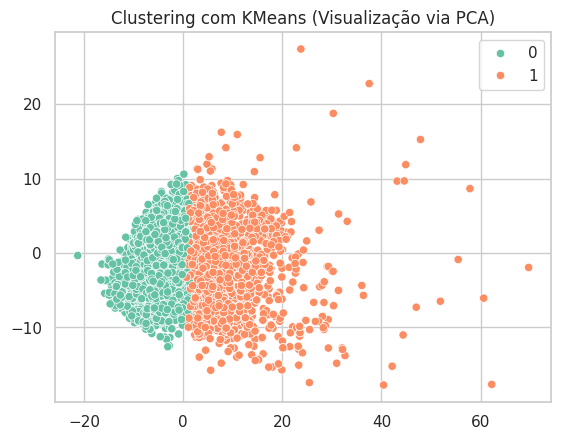

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(feat_scaled)

sns.scatterplot(x=feat_pca[:,0], y=feat_pca[:,1], hue=clusters, palette="Set2")
plt.title("Clustering com KMeans (Visualização via PCA)")
plt.show()

Verifica-se uma divisãoc clara de dois clusters. Sendo quase oposto daquilo que se viu no plot do PCA. Isso acontece porque o KMeans usa distância entre pontos como critério de agrupamento, enquanto o PCA apenas projeta a variabilidade dos dados.


#Analise Supervisionada



A análise supervisionada em aprendizado de máquina é um tipo de modelagem onde um algoritmo aprende a partir de dados rotulados, ou seja, onde as entradas (features) já possuem associações conhecidas com saídas corretas.
O objetivo é treinar um modelo para que, ao receber novas entradas, consiga prever a saída correspondente com alta precisão.
Neste trabalho, a análise supervisionada serve para classificar os dados de entrada (feat_scaled) com base na variável de saída Y. Diferentes modelos são testados para avaliar qual deles desempenha melhor essa tarefa.




O código seguinte importa os modelos que intencionamos usar para o machine learning :

In [ ]:
#sem isso previamente não consegues rodar
# Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
)

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Pipeline
from sklearn.pipeline import Pipeline

# Visualization
import matplotlib.pyplot as plt

y=out['Y']

De seguida remove-se as colunas sem variação para o dataframe que será usado nos modelos machine learning

In [ ]:
cols_sem_var=[col for col in df.columns if df[col].var()==0]
df_ML=feat.drop(columns=cols_sem_var)
df_ML.shape

(12513, 208)

Normaliza-se os dados com o scaler.fit_transform para que estejam na mesma escala para depois se aplicar os modelos de Random Forest, regressão logística, SVM, XGBoost e redes neurais.  Cada modelo é avaliado por avaliação cruzada com um score associado AUC.


In [ ]:
X_scaled = scaler.fit_transform(df_ML)
models = {
    'RF': RandomForestClassifier(n_estimators=200, random_state=42),
    'LR_L1': LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000),
    'SVM': SVC(kernel='rbf', probability=True),
    'XGB': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

for name, model in models.items():
    auc = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc').mean()
    print(f'{name}: AUC médio = {auc:.4f}')



RF: AUC médio = 0.8292
LR_L1: AUC médio = 0.8133
SVM: AUC médio = 0.8438


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGB: AUC médio = 0.8204
MLP: AUC médio = 0.7918


Os moddelos com melhor AUC medio são o Random Forest e o SVM. Estes serão usados em seguida para treino de machine learning supervisionado.

Criou-se funções auxiliares para testar cada um dos modelos:

A primeira função, split_and_scale, tem o papel de dividir o conjunto de dados em treino, validação e teste. Inicialmente, separa 20% dos dados para teste e os restantes 80% para treino e validação. Em seguida, a parte de treino é novamente dividida, reservando 25% para validação. Depois da divisão, os dados são padronizados com StandardScaler, garantindo que todas as variáveis tenham a mesma escala e evitando problemas como um impacto desproporcional de variáveis com valores maiores. A função retorna os conjuntos de treino, validação e teste já escalonados, junto com as respectivas variáveis alvo.
A segunda função, train_and_evaluate, recebe um modelo de aprendizado de máquina e um conjunto de dados. Primeiro, chama split_and_scale para preparar os dados.

Em seguida, treina o modelo usando os dados de treino e faz previsões no conjunto de validação. Para medir o desempenho, calcula a Área Sob a Curva ROC (AUC) e a acurácia, imprimindo os resultados junto com o número de variáveis usadas. Essa função é útil para testar diferentes conjuntos de características e avaliar seu impacto no desempenho do modelo.

Por fim, a função final_test treina o modelo nos dados de treino e validação e avalia sua performance final nos dados de teste. Calcula as mesmas métricas de AUC e acurácia e imprime um relatório de classificação, mostrando métricas como precisão e recall para cada classe. Além disso, gera uma matriz de confusão, que visualiza os acertos e erros do modelo ao predizer cada classe.


In [ ]:
def split_and_scale(X, y):
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

    scaler = StandardScaler()
    return (
        scaler.fit_transform(X_train),
        scaler.transform(X_val),
        scaler.transform(X_test),
        y_train, y_val, y_test
    )

def train_and_evaluate(model, X, y, label=""):
    X_train, X_val, X_test, y_train, y_val, y_test = split_and_scale(X, y)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    print(f"\n{label} ({X.shape[1]} features)")
    print("AUC :", roc_auc_score(y_val, y_proba))
    print("Acc:", accuracy_score(y_val, y_pred))

def final_test(model, X, y):
    X_train, X_val, X_test, y_train, y_val, y_test = split_and_scale(X, y)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("TESTE FINAL:")
    print("AUC :", roc_auc_score(y_test, y_proba))
    print("Acc:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

  Para o modelo Random Forest:
  
  De modo a definir qual o número ideal de features a utilizar para o modelo de machine learning Random Forest, testou-se os modelos com 50, 100, 120 e todas as features mais correlacionadas com a variável Y (selecionadas correlação ponto-biseral feita anteriormente).

In [ ]:
top_50 = corrs.abs().nlargest(50).index
top_100 = corrs.abs().nlargest(100).index
top_120 = corrs.abs().nlargest(120).index
df_ML_cols = df_ML.columns

diff_ks=[top_50,top_100,top_120,df_ML_cols]
y=out['Y']

In [ ]:
for subset in diff_ks:
    train_and_evaluate(RandomForestClassifier(n_estimators=200, random_state=42), df[subset], y, label="Random Forest")


Random Forest (50 features)
AUC : 0.8736815351378828
Acc: 0.8078306032760687

Random Forest (100 features)
AUC : 0.8784820501366442
Acc: 0.7998401917698762

Random Forest (120 features)
AUC : 0.8801520735375101
Acc: 0.8050339592489013

Random Forest (204 features)
AUC : 0.8831493868665048
Acc: 0.8102277267279265


Com o scores calculados para cada iteração do modelo Random Forest o melhor foi com todas as features (df_ML). Este será usada para o teste final.

TESTE FINAL:
AUC : 0.8810994042599076
Acc: 0.8134238913304035
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1342
           1       0.79      0.81      0.80      1161

    accuracy                           0.81      2503
   macro avg       0.81      0.81      0.81      2503
weighted avg       0.81      0.81      0.81      2503



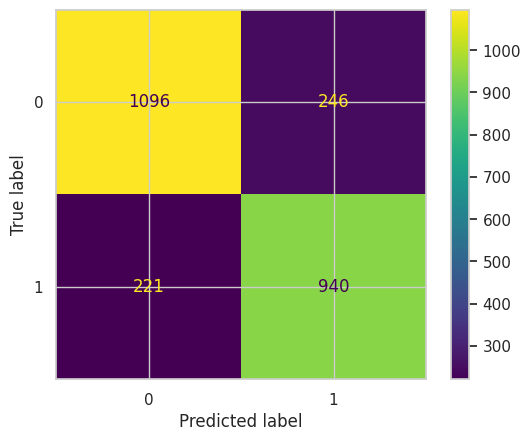

In [ ]:
final_test(RandomForestClassifier(n_estimators=200, random_state=42), df_ML, y)

O modelo apresenta um desempenho geral satisfatório, com uma AUC de 0,881, o que indica uma boa capacidade de separação entre as classes. A acurácia global é de aproximadamente 81,3%, mostrando que o modelo acerta a maioria das previsões. A matriz de confusão mostra que dos 1342 exemplos da classe 0, 1096 foram corretamente classificados, enquanto 246 foram classificados incorretamente como classe 1. Já para os 1161 exemplos da classe 1, 940 foram corretamente identificados e 221 foram classificados erroneamente como classe 0. As métricas de precisão, recall e f1-score estão bem equilibradas entre as duas classes: para a classe 0, a precisão é de 0,83, o recall de 0,82 e o f1-score de 0,82; para a classe 1, a precisão é de 0,79, o recall de 0,81 e o f1-score de 0,80. Esses valores indicam que o modelo consegue manter uma boa performance mesmo com um leve desequilíbrio de classes

Para o modelo SVM:

O mesmo se repetiu para o modelo SVM com todas as features (df_ML) se sobresaiondo como o melhor score.

In [ ]:
for subset in diff_ks:
  train_and_evaluate(SVC(kernel='rbf', probability=True, random_state=42), df[subset], y, label="SVM")


SVM (50 features)
AUC : 0.8682562054655077
Acc: 0.7958449860167799

SVM (100 features)
AUC : 0.8812149323967853
Acc: 0.8102277267279265

SVM (120 features)
AUC : 0.883479283879589
Acc: 0.8082301238513784

SVM (204 features)
AUC : 0.8877210919719499
Acc: 0.8198162205353575


TESTE FINAL:
AUC : 0.8859262340009576
Acc: 0.8142229324810227
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1342
           1       0.79      0.81      0.80      1161

    accuracy                           0.81      2503
   macro avg       0.81      0.81      0.81      2503
weighted avg       0.81      0.81      0.81      2503



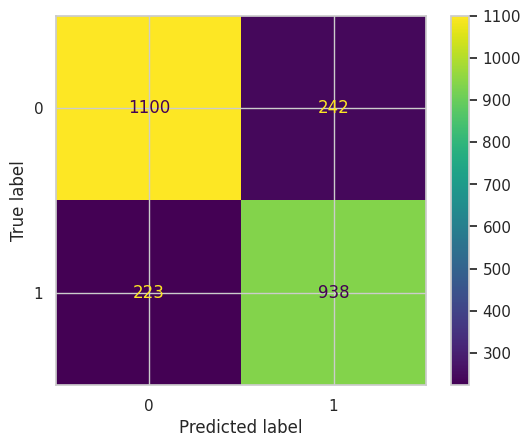

In [ ]:
final_test(SVC(kernel='rbf', probability=True, random_state=42), df_ML, y)


Este modelo apresenta um desempenho consistente e sólido, com AUC de 0,886, indicando excelente capacidade de distinção entre as classes. A acurácia foi de aproximadamente 81,4%, o que mostra que o modelo acerta a maioria das previsões feitas. A matriz de confusão revela que, entre os 1342 exemplos da classe 0, 1100 foram corretamente classificados, enquanto 242 foram incorretamente atribuídos à classe 1. Para os 1161 exemplos da classe 1, 938 foram corretamente identificados e 223 foram classificados de forma incorreta como classe 0. As métricas de avaliação também estão equilibradas: a classe 0 obteve precisão de 0,83, recall de 0,82 e f1-score de 0,83, enquanto a classe 1 teve precisão de 0,79, recall de 0,81 e f1-score de 0,80. Isso mostra que o modelo mantém um bom desempenho mesmo com uma leve assimetria nas classes e nos erros.

Comparando este modelo com o anterior, ambos demonstram desempenhos muito semelhantes, com pequenas variações nos números. O modelo SVM teve uma leve melhora na AUC (de 0,881 para 0,886) e uma acurácia marginalmente superior ao RF (de 81,3% para 81,4%), o que sugere uma melhoria sutil na separação entre as classes. As métricas de precisão, recall e f1-score também se mantiveram praticamente iguais, com pequenas oscilações que podem estar dentro da variação natural de diferentes testes. Em termos práticos, ambos os modelos são eficazes e equilibrados, mas o modelo SVM pode ser preferido em contextos que valorizem uma capacidade ligeiramente superior de discriminação entre classes, representada pelo aumento no AUC.

Seleção de features com o SelectKBest:

O SelectKBest é um método alternativo de busca pelo número de features ideal para modelos machine learning. Em contraste com a relação linear empenhada nas correlações ponto biseral, o SelectKBest captura qualquer tipo de dependência incluindo padrões mais complexos. Em seguida, os dados são normalizados com StandardScaler, assegurando que todas as variáveis estejam na mesma escala e evitando que características de magnitudes distintas tenham impactos desproporcionais no modelo. Por fim, um Random Forest Classifier é treinado e validado com diferentes conjuntos de features, permitindo avaliar como o número de variáveis influencia a performance do modelo de classificação.



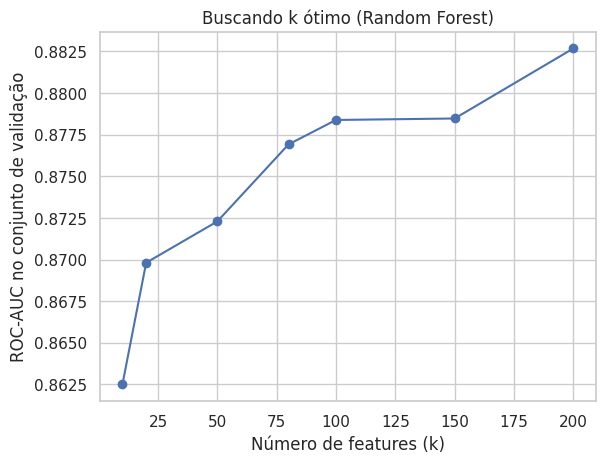

In [ ]:
ks = [10, 20, 50, 80, 100, 150, 200]
aucs = []

X_train, X_val, _, y_train, y_val, _ = split_and_scale(df_ML, y)

for k in ks:
    pipe = Pipeline([
        ('sel', SelectKBest(lambda X, y: mutual_info_classif(X, y, random_state=42), k=k)),
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(random_state=42))
    ])
    pipe.fit(X_train, y_train)
    y_proba = pipe.predict_proba(X_val)[:, 1]
    aucs.append(roc_auc_score(y_val, y_proba))

plt.plot(ks, aucs, marker='o')
plt.xlabel("Número de features (k)")
plt.ylabel("ROC-AUC no conjunto de validação")
plt.title("Buscando k ótimo (Random Forest)")
plt.grid(True)
plt.show()

O número de features ótimo é de 200, com AUC de 0.88. O valor de K se assemelha com o que foi usado no teste final (df_ML). Assim podemos concluir que, para o modelo Random Forest, o número de features utlizado é ideal.

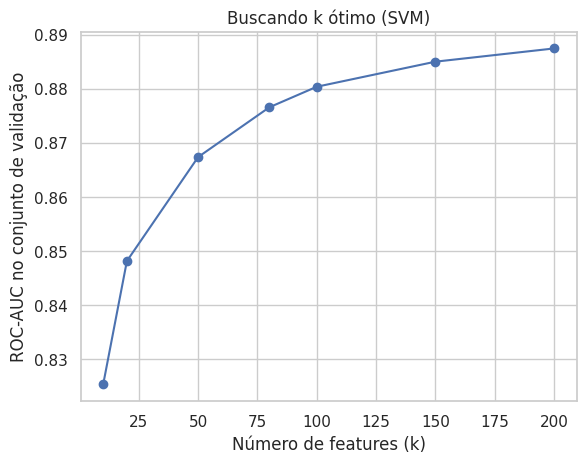

In [ ]:
ks = [10, 20, 50, 80, 100, 150, 200]
aucs = []

X_train, X_val, _, y_train, y_val, _ = split_and_scale(df_ML, y)

for k in ks:
    pipe = Pipeline([
        ('sel', SelectKBest(mutual_info_classif, k=k)),
        ('scaler', StandardScaler()),
        ('clf', SVC(kernel='rbf', probability=True, random_state=42))
    ])
    pipe.fit(X_train, y_train)
    y_proba = pipe.predict_proba(X_val)[:, 1]
    aucs.append(roc_auc_score(y_val, y_proba))

plt.plot(ks, aucs, marker='o')
plt.xlabel("Número de features (k)")
plt.ylabel("ROC-AUC no conjunto de validação")
plt.title("Buscando k ótimo (SVM)")
plt.grid(True)
plt.show()

O número de features ótimo é 200. Com AUC de 0.88. O valor de K se assemelha com o que foi usado no teste final (df_ML). Assim podemos concluir que, para o modelo SVM, o número de features utlizado é ideal.


De modo a visualizar as métricas dos modelos fez se gráficos de barras comparando-as:

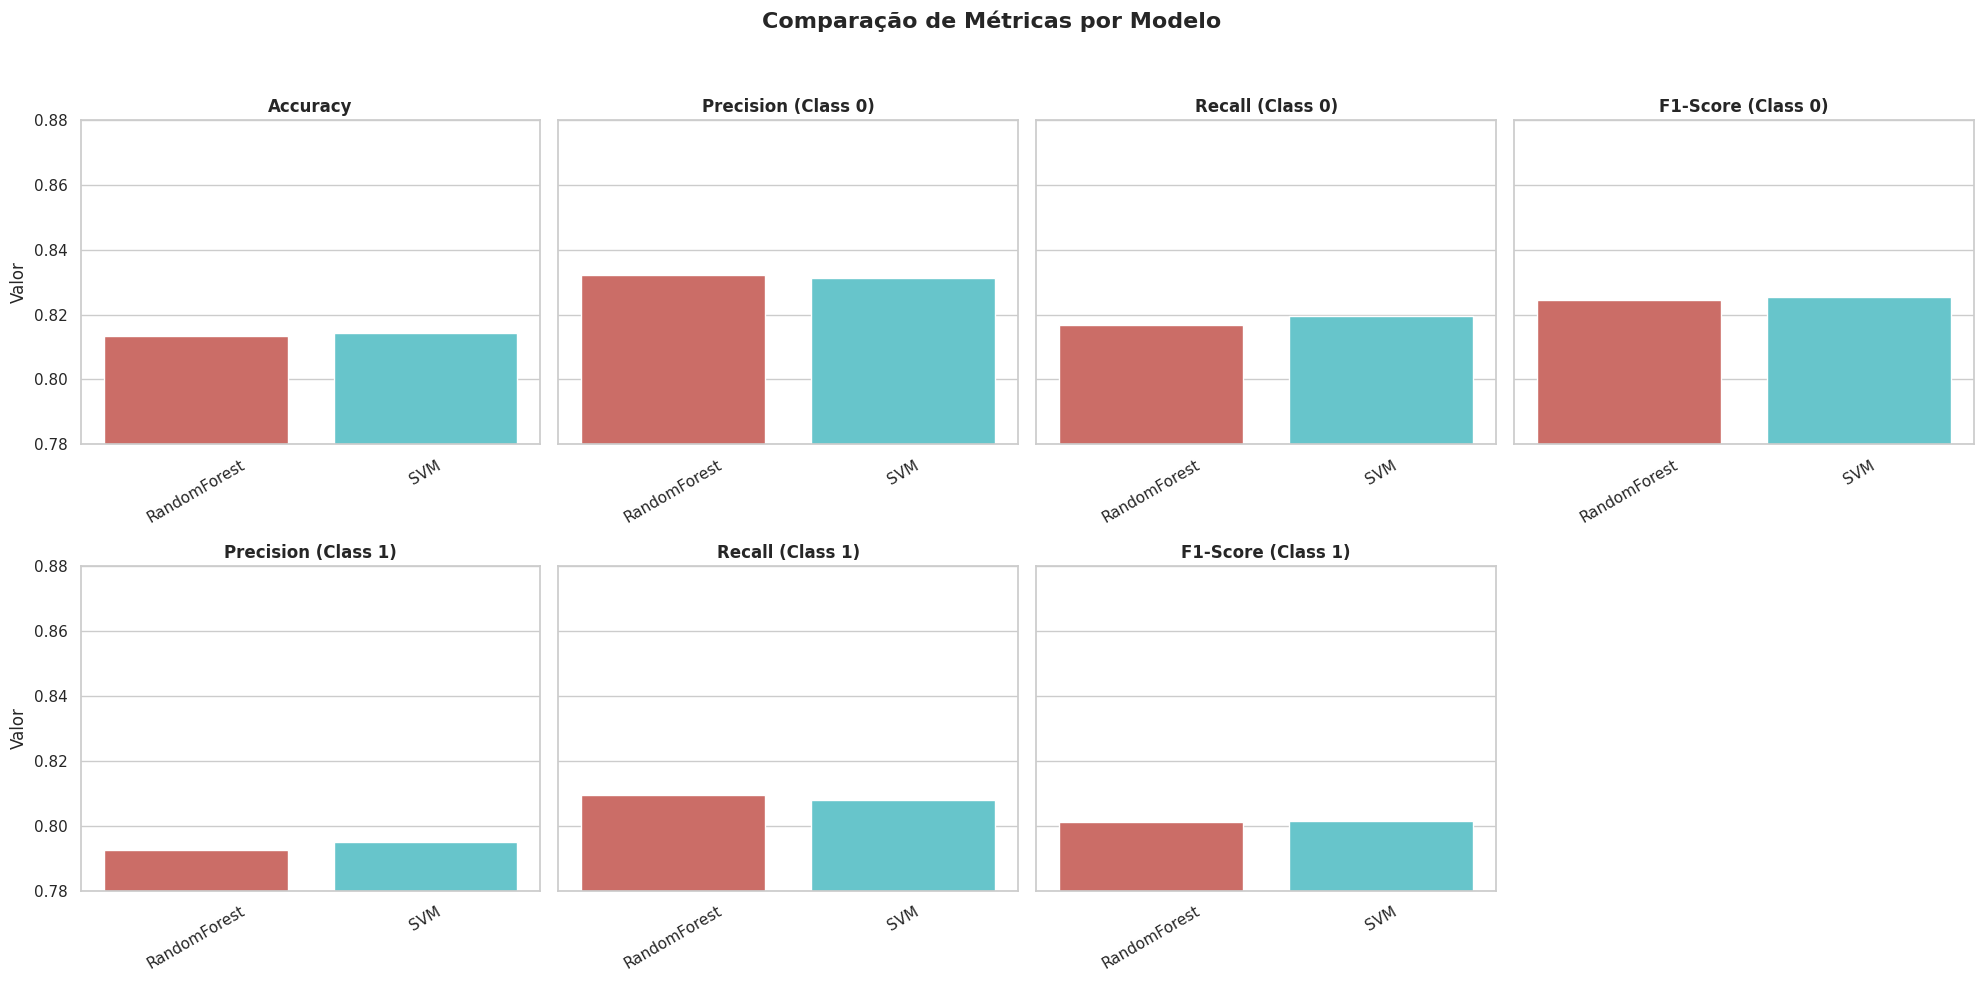

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados
data = {
    'Model': ['RandomForest', 'SVM'],
    'Accuracy': [0.8134, 0.8142],
    'Precision (Class 0)': [0.8322, 0.8314],
    'Recall (Class 0)': [0.8167, 0.8197],
    'F1-Score (Class 0)': [0.8244, 0.8255],
    'Precision (Class 1)': [0.7926, 0.7949],
    'Recall (Class 1)': [0.8096, 0.8079],
    'F1-Score (Class 1)': [0.8010, 0.8014],
}

df = pd.DataFrame(data)
df_long = df.melt(id_vars='Model', var_name='Métrica', value_name='Valor')

# Métricas únicas
metricas = df_long['Métrica'].unique()

# Configura layout 4 colunas x 2 linhas
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
axes = axes.flatten()  # Facilita o loop

# Plota cada métrica
for i, metrica in enumerate(metricas):
    sns.barplot(
        data=df_long[df_long['Métrica'] == metrica],
        x='Model', y='Valor', hue='Model', ax=axes[i],
        palette='hls', legend=False
    )
    axes[i].set_title(metrica, fontsize=12, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('' if i % 4 != 0 else 'Valor')
    axes[i].set_ylim(0.78, 0.88)
    axes[i].tick_params(axis='x', rotation=30)

# Remove o 8º subplot (extra)
for j in range(len(metricas), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Comparação de Métricas por Modelo", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Em suma conseguimos ver que os modelos Random Forest e SVM são modelos muito similares em termos de métricas e estatisticamente satisfatórios para a predição de atividade da coenzima cyp2cy19 sobre fármacos.
